In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Eric Meinhardt / emeinhardt@ucsd.edu**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Processing-steps" data-toc-modified-id="Processing-steps-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Processing steps</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outputs</a></span></li></ul></li><li><span><a href="#Imports-/-loading-data" data-toc-modified-id="Imports-/-loading-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports / loading data</a></span><ul class="toc-item"><li><span><a href="#More-code-for-interfacing-with-Buckeye" data-toc-modified-id="More-code-for-interfacing-with-Buckeye-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>More code for interfacing with Buckeye</a></span></li></ul></li><li><span><a href="#Seyfarth's-utterance-segmentation" data-toc-modified-id="Seyfarth's-utterance-segmentation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seyfarth's utterance segmentation</a></span><ul class="toc-item"><li><span><a href="#Segmentation-using-the-utterance-container" data-toc-modified-id="Segmentation-using-the-utterance-container-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Segmentation using the <code>utterance</code> container</a></span></li><li><span><a href="#Making-an-utterance-relation" data-toc-modified-id="Making-an-utterance-relation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Making an utterance relation</a></span></li><li><span><a href="#Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file" data-toc-modified-id="Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Write utterance relation, vocabulary and simple utterance list to file</a></span><ul class="toc-item"><li><span><a href="#Utterance-relation" data-toc-modified-id="Utterance-relation-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Utterance relation</a></span></li><li><span><a href="#(Orthographic)-Vocabulary" data-toc-modified-id="(Orthographic)-Vocabulary-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>(Orthographic) Vocabulary</a></span></li><li><span><a href="#Simple-utterance-list" data-toc-modified-id="Simple-utterance-list-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Simple utterance list</a></span></li></ul></li><li><span><a href="#Utterance-statistics" data-toc-modified-id="Utterance-statistics-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Utterance statistics</a></span></li></ul></li><li><span><a href="#Comparison-with-Fisher" data-toc-modified-id="Comparison-with-Fisher-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison with Fisher</a></span></li><li><span><a href="#Speaker-statistics" data-toc-modified-id="Speaker-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Speaker statistics</a></span></li><li><span><a href="#Making-a-word-relation-for-confusability-analysis" data-toc-modified-id="Making-a-word-relation-for-confusability-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Making a word relation for confusability analysis</a></span><ul class="toc-item"><li><span><a href="#Write-to-file" data-toc-modified-id="Write-to-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Write to file</a></span></li></ul></li><li><span><a href="#Word-type-statistics" data-toc-modified-id="Word-type-statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Word type statistics</a></span></li><li><span><a href="#Applying-exclusion-criteria-to-the-word-relation" data-toc-modified-id="Applying-exclusion-criteria-to-the-word-relation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Applying exclusion criteria to the word relation</a></span></li><li><span><a href="#Unigram,-bigram,-trigram,-and-4-gram-contexts" data-toc-modified-id="Unigram,-bigram,-trigram,-and-4-gram-contexts-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Unigram, bigram, trigram, and 4-gram contexts</a></span><ul class="toc-item"><li><span><a href="#Write-to-file" data-toc-modified-id="Write-to-file-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Write to file</a></span></li></ul></li></ul></div>

# Overview

The goal of this notebook is to produce (/document the production of) a representation of Buckeye corpus data whose vocabulary has been normalized with respect to the Fisher corpus and where utterance segmentation has been performed. The motivation for doing this is applying a language model trained on (a slightly processed version of) the Fisher corpus to Buckeye.

## Processing steps

To that end, 
 1. A smattering of orthographic wordforms and transcriptions are aligned and/or corrected per the other notebook in this repository (`Converting Buckeye Transcriptions to Unicode IPA symbols`).
 2. Utterances are segmented per Seyfarth (2014) / his `buckeye` package.
 3. Non-speech noises are removed from utterances:
  - `'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'` are removed from the orthographic representation that is the input to a language model.
  - All other word-level containers that are not words (i.e. are `Pause` objects in `buckeye`) are indicated with `<rem>` in the orthographic representation that is the input to a language model.
 4. All orthographic characters are lower-cased.

## Dependencies

 - A local copy of the Buckeye corpus data.
 - The `buckeye` python package.
 
 
 - `funcy`
 - `pandas`
 - `plotnine`

## Outputs

If run successfully, this notebook will create eight files as outputs:
 1. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing an utterance (and associated metadata) in the Buckeye corpus.
 2. A .txt file containing one utterance from Buckeye per line, suitable for use with a language model.
 3. A .txt file containing the vocabulary (one wordform per line) of the previous file.
 4. Four .txt files containing every unigram, bigram, trigram, and 4-gram (respectively) context in file #2.
 5. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing a wordform token (and associated metadata) in the Buckeye corpus.

# Imports / loading data

In [227]:
from collections import OrderedDict

In [2]:
import os
import csv
import json

In [ ]:
buckeye_dir = '/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [ ]:
#only useful/interesting if you want to do comparisons with the fisher corpus..
fisher_repo_dir = '/mnt/cube/home/AD/emeinhar/fisher-lm'

In [3]:
os.getcwd()
repo_dir = "/mnt/cube/home/AD/emeinhar/buckeye-lm"

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

In [4]:
main_project_dir = "/mnt/cube/home/AD/emeinhar/wr"
os.chdir(main_project_dir)
from boilerplate import *

In [5]:
os.chdir(repo_dir)

In [6]:
def dictionary_product(dictA, dictB):
    '''
    Given two dictionaries dictA and dictB, this non-statefully 
    creates a 'merged' dictionary.
    
    Note that dictA and dictB must either have disjoint keys,
    or every key they share must map to the same value.
    '''
    keys_A = set(dictA.keys())
    keys_B = set(dictB.keys())
    common_keys = set(keys_A) & set(keys_B)
    conflicting_common_keys = {k for k in common_keys if dictA[k] != dictB[k]}
    assert conflicting_common_keys == set(), 'The dictionaries must have either zero common keys, or all common keys must map to the same value. Conflicting common keys: {0}'.format(conflicting_common_keys)
#     assert common_keys == set(), 'The dictionaries must have no common keys. They share {0}'.format(common_keys)
    
    dictC = dict()
    dictC.update({k:dictA[k] for k in keys_A})
    dictC.update({k:dictB[k] for k in keys_B})
    return dictC

dict_prod = lambda Ds: reduce(dictionary_product, Ds)

In [7]:
# see https://github.com/scjs/buckeye 
import buckeye as b

In [8]:
import pandas as pd
from plotnine import *

In [9]:
from itertools import chain, starmap
from collections import Counter

## More code for interfacing with Buckeye

In [10]:
nonwords_to_filter_out = {'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'}

def isPauseOrDisfluency(container):
    return not isWord(container)
#     if type(container) == b.containers.Word:
#         return False
#     return True

def get_orthography_REM_sensitive(container):
#     if type(container) == b.containers.Word:
#         if container.orthography == 'dont':
#             return "don't"
#         return container.orthography
    if isWord(container):
        return get_orthography(container)
    if container.entry in nonwords_to_filter_out:
        return ''
    return '<rem>'

filledPauses = {
 'ah',
 'hm',
 'hmm',
#  'huh',
#  'huh-uh',
#  'hum',
#  'hum-um',
#  'mm',
#  'mm-hmm',
 'uh',
#  'uh-huh',
#  'uh-hum',
#  'uh-uh',
 'um',
#  'um-hmm',
#  'um-huh',
#  'um-hum'
}

def isFilledPause(word):
    return get_orthography(word) in filledPauses

In [11]:
def isWord(container):
    return type(container) == b.containers.Word

def getWords(track):
    return [w for w in track.words if isWord(w)]
#     return filter(isWord, track.words)

In [231]:
buckeyeUnicodeIPArelation = {
 ('a', 'ʌ'),
 ('aa', 'ɑ'),
 ('aan', 'ɑ̃'),
 ('ae', 'æ'),
 ('aen', 'æ̃'),
 ('ah', 'ʌ'),
 ('ahn', 'ʌ̃'),
 ('an', 'ʌ̃'),
 ('ao', 'ɔ'),
 ('aon', 'ɔ̃'),
 ('aw', 'aʊ'),
 ('awn', 'ãʊ̃'),
 ('ay', 'aɪ'),
 ('ayn', 'ãɪ̃'),
 ('b', 'b'),
 ('ch', 'tʃ'),
 ('d', 'd'),
 ('dh', 'ð'),
 ('dx', 'ɾ'),
 ('eh', 'ɛ'),
 ('ehn', 'ɛ̃'),
 ('el', 'l̩'),
 ('em', 'm̩'),
 ('en', 'n̩'),
 ('eng', 'ŋ̩'),
 ('er', 'ɚ'),
 ('ern', 'ɚ̃'),
 ('ey', 'eɪ'),
 ('eyn', 'ẽɪ̃'),
 ('f', 'f'),
 ('g', 'g'),
 ('h', 'h'),
 ('hh', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('ih', 'ɪ'),
 ('ihn', 'ɪ̃'),
 ('iy', 'i'),
 ('iyih', 'ĩ'),
 ('iyn', 'ĩ'),
 ('jh', 'dʒ'),
 ('k', 'k'),
 ('l', 'l'),
 ('m', 'm'),
 ('n', 'n'),
 ('ng', 'ŋ'),
 ('nx', 'ɾ̃'),
 ('ow', 'oʊ'),
 ('own', 'õʊ̃'),
 ('oy', 'ɔɪ'),
 ('oyn', 'ɔ̃ɪ̃'),
 ('p', 'p'),
 ('q', 'ʔ'),
 ('r', 'ɹ'),
 ('s', 's'),
 ('sh', 'ʃ'),
 ('t', 't'),
 ('th', 'θ'),
 ('tq', 'ʔ'),
 ('uh', 'ʊ'),
 ('uhn', 'ʊ̃'),
 ('uw', 'u'),
 ('uwix', 'u'),
 ('uwn', 'ũ'),
 ('v', 'v'),
 ('w', 'w'),
 ('y', 'j'),
 ('z', 'z'),
 ('zh', 'ʒ')}

def buckeyeToUnicodeIPA(buckeyeSymbol):
    mapping = dict(buckeyeUnicodeIPArelation)
    #print(mapping)
    return mapping[buckeyeSymbol]

In [232]:
from funcy import compose

def get_orthography(word):
    if word.orthography == 'dont':
        return "don't"
    return word.orthography

def filter_x(segSeq):
    return tuple([seg for seg in segSeq if seg != 'x'])

def intercept(item_to_replace, replacement):
    def transform(el):
        if el == item_to_replace:
            return replacement
        return el
    return transform

def phonemic_vowel_fixer(word, phonemes_IPA):
    if word.orthography == 'uh' and word.phonemic == ['ah', 'ah']:
        return phonemes_IPA[0]
    elif word.orthography == 'o' and word.phonemic == ['ow', 'ow']:
#         print(phonemes_IPA[:1])
        return phonemes_IPA[:1]
    elif word.orthography == 'Ellimen':
        return ('ɛ', 'l', 'ʌ', 'm', 'ɛ', 'n')
    return phonemes_IPA

def phonemic_flap_fixer(word, phonemes_IPA):
    flap_to_d = {"skateboarding",
                 "yadda",
                 "shoulda",
                 "dont",
                 "doody"}
    flap_to_t = {"littlest",
                 "lotta",
                 "introvertal",
                 "shut-outs",
                 "disparity",
                 "exporting",
                 "out-r-inn",
                 "tattletale",
                 "ritalin"}
    replaceWithd = intercept('ɾ', 'd')
    replaceWitht = intercept('ɾ', 't')
    if word.orthography in flap_to_d:
        return tuple(map(replaceWithd, phonemes_IPA))
    elif word.orthography in flap_to_t:
        return tuple(map(replaceWitht, phonemes_IPA))
    else:
        return phonemes_IPA

def fix_phonemes(word, phonemes_IPA):
#     if word.orthography == 'dont' and word.phonemic[-1] == 'tq':
#             return phonemes_IPA[:-1] + ('t',)
    replaceʔ = intercept('ʔ', 't')
    replaceɔ = intercept('ɔ', 'ɑ')
    replaceɾ̃ = intercept('ɾ̃', 'n')
    replacer = compose(replaceʔ, replaceɔ, replaceɾ̃)
    new_phonemes = tuple(map(replacer, phonemes_IPA))
    new_phonemes = phonemic_flap_fixer(word, new_phonemes)
    new_phonemes = phonemic_vowel_fixer(word, new_phonemes)
    return new_phonemes

def get_phonemes(word, inIPA=True, asDottedString=True):
    phonemes = tuple(word.phonemic)
    if inIPA:
        phonemes = filter_x(phonemes)
        phonemes = tuple(map(buckeyeToUnicodeIPA,
                             phonemes))
        phonemes = fix_phonemes(word, phonemes)
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

non_speech_inventory = {'{B_TRANS}',
                        '{E_TRANS}',
                        '',
                        'IVER',
                        'LAUGH',
                        'NOISE',
                        'SIL',
                        'UNKNOWN',
                        'VOCNOISE'}

def id_nonspeech(phone):
    if phone in non_speech_inventory:
        return phone
    return buckeyeToUnicodeIPA(phone)

def get_phones(word, inIPA=True, asDottedString=True):
    if not isWord(word):
        return word.phonetic
    phones = tuple(word.phonetic)
    if inIPA:
        phones = filter_x(phones)
#         phones = tuple(map(buckeyeToUnicodeIPA,
#                            phones))
        phones = tuple(map(id_nonspeech,
                           phones))
    if asDottedString:
        return t2ds(phones)
    return phones

In [234]:
#vowels + syllabic nasals + syllabic liquids

print(b.containers.SYLLABIC)
print(len(b.containers.SYLLABIC))


{seg:buckeyeToUnicodeIPA(seg)
 for seg in b.containers.SYLLABIC}

len(set({seg:buckeyeToUnicodeIPA(seg)
 for seg in b.containers.SYLLABIC}.values()))

{'ehn', 'iy', 'aen', 'ay', 'ayn', 'ao', 'eh', 'uw', 'ae', 'ihn', 'eng', 'oy', 'en', 'em', 'own', 'er', 'awn', 'iyn', 'aon', 'eyn', 'ahn', 'aan', 'uwn', 'oyn', 'ih', 'ey', 'uh', 'aa', 'ow', 'el', 'uhn', 'ah', 'aw'}
33


{'ehn': 'ɛ̃',
 'iy': 'i',
 'aen': 'æ̃',
 'ay': 'aɪ',
 'ayn': 'ãɪ̃',
 'ao': 'ɔ',
 'eh': 'ɛ',
 'uw': 'u',
 'ae': 'æ',
 'ihn': 'ɪ̃',
 'eng': 'ŋ̩',
 'oy': 'ɔɪ',
 'en': 'n̩',
 'em': 'm̩',
 'own': 'õʊ̃',
 'er': 'ɚ',
 'awn': 'ãʊ̃',
 'iyn': 'ĩ',
 'aon': 'ɔ̃',
 'eyn': 'ẽɪ̃',
 'ahn': 'ʌ̃',
 'aan': 'ɑ̃',
 'uwn': 'ũ',
 'oyn': 'ɔ̃ɪ̃',
 'ih': 'ɪ',
 'ey': 'eɪ',
 'uh': 'ʊ',
 'aa': 'ɑ',
 'ow': 'oʊ',
 'el': 'l̩',
 'uhn': 'ʊ̃',
 'ah': 'ʌ',
 'aw': 'aʊ'}

33

In [14]:
# buckeye_dir = '/mnt/cube/home/AD/emeinhar/buckeye-zips'
print(buckeye_dir)

In [15]:
os.chdir(buckeye_dir)
os.getcwd()
print(os.listdir())

'/mnt/cube/home/AD/emeinhar/buckeye-zips'

['s05.zip', 's02.zip', 's39.zip', 's37.zip', 's30.zip', 's21.zip', 's26.zip', 's28.zip', 's31.zip', 's36.zip', 's38.zip', 's03.zip', 's04.zip', 's15.zip', 's12.zip', 's29.zip', 's27.zip', 's16.zip', 's18.zip', 's24.zip', 's35.zip', 's40.zip', 's09.zip', 's07.zip', 's19.zip', 's17.zip', 's10.zip', 's01.zip', 's06.zip', 's34.zip']


In [16]:
files = os.listdir()

In [17]:
speakers = [b.Speaker.from_zip(file) for file in files]
len(speakers)

30

In [18]:
tracks = list(union([set(s.tracks) for s in speakers]))
len(tracks)

193

In [19]:
s = speakers[0]
t = tracks[0]

In [20]:
def speaker_relation(s):
    r = {
    "speaker_age":s.age,
    "speaker_name":s.name,
    "speaker_interviewer":s.interviewer,
    "speaker_sex":s.sex
    }
    return r


def track_relation(s):
    return {"track_name":s.name}

In [238]:
w2 = t.words[2]; w2
w2.pos

Word('um-hum', 0.869006, 1.184743, ['em', 'hh', 'em'], ['ah', 'hh', 'ah'], 'UH')

'UH'

# Seyfarth's utterance segmentation

## Segmentation using the `utterance` container

In [21]:
def get_utterances(track):
    return [u for u in b.words_to_utterances(track.words)]

In [22]:
utterances = list(union([set(get_utterances(t)) for t in tracks]))
len(utterances)

18771

## Making an utterance relation

In [23]:
def getNonWords(utterance):
    non_words = [w for w in utterance.words if not isWord(w)]
    return non_words

def hasNonWords(utterance):
    nWs = getNonWords(utterance)
    if len(nWs) > 0:
        return True
    return False

In [24]:
utts_with_nonwords = [u for u in utterances if hasNonWords(u)]
len(utts_with_nonwords)

8497

In [25]:
nonwords = list(chain.from_iterable(map(getNonWords,
                                        utts_with_nonwords)))
len(nonwords)

20840

In [26]:
doNotReplaceWithREM = {'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'}
uninteresting_entries = {'<VOCNOISE>', '<SIL>','<IVER>','<UNKNOWN>', '<LAUGH>','<NOISE>','<ERROR>','{B_TRANS}','<CUTOFF>'}

In [27]:
interesting_nonwords = [nw for nw in nonwords if nw.entry not in uninteresting_entries and '=' not in nw.entry]
len(interesting_nonwords)

944

In [28]:
interesting_nonwords

[Pause('<VOCNOISE-cars>', 22.116116, 22.590375),
 Pause('<VOCNOISE-things>', 512.970327, 513.22095),
 Pause("<VOCNOISE-they'd>", 513.334305, 513.502774),
 Pause("<VOCNOISE-it's>", 514.33992, 514.48655),
 Pause('<VOCNOISE-just>', 514.959719, 515.28522),
 Pause('<VOCNOISE-assault>', 516.041252, 516.439545),
 Pause("<EXT-they're>", 538.443053, 538.766471),
 Pause("<VOCNOISE-that's>", 533.581365, 533.905823),
 Pause('<EXT-were>', 546.307032, 546.605492),
 Pause('<HES-uh>', 129.319627, 129.694164),
 Pause('<HES-and>', 132.142625, 132.602024),
 Pause('<EXT-are>', 591.502537, 591.741721),
 Pause('<VOCNOISE-with>', 592.190974, 592.38856),
 Pause('<VOCNOISE-day>', 294.641703, 294.94775),
 Pause('<HES-uh>', 298.798981, 299.160315),
 Pause('<UNKNOWN-what_do_you>', 89.910768, 90.028111),
 Pause('<VOCNOISE-it>', 127.515717, 127.820358),
 Pause('<NOISE-pretty>', 55.927614, 56.144067),
 Pause('<VOCNOISE-ripple>', 86.462066, 86.786179),
 Pause('<LAUGH-where>', 145.197008, 145.401714),
 Pause('<CUTOFF-

In [29]:
nonword_entry_types = set(map(lambda nw: nw.entry, interesting_nonwords))
len(nonword_entry_types)

574

In [30]:
nonword_entry_types

{'<CUTOFF-I>',
 '<CUTOFF-UNKNOWN>',
 '<CUTOFF-a a>',
 '<CUTOFF-a>',
 '<CUTOFF-always>',
 '<CUTOFF-carp+carpet>',
 '<CUTOFF-daughter>',
 '<CUTOFF-do>',
 '<CUTOFF-has>',
 "<CUTOFF-he's>",
 '<CUTOFF-he-here>',
 '<CUTOFF-i-it>',
 '<CUTOFF-in>',
 "<CUTOFF-it's>",
 '<CUTOFF-it>',
 '<CUTOFF-kids>',
 '<CUTOFF-match>',
 '<CUTOFF-never>',
 '<CUTOFF-see>',
 '<CUTOFF-sh-seen>',
 '<CUTOFF-spe-supposed>',
 '<CUTOFF-start>',
 '<CUTOFF-suppose>',
 '<CUTOFF-th-think>',
 '<CUTOFF-the-they>',
 '<CUTOFF-the>',
 '<CUTOFF-their>',
 '<CUTOFF-think?>',
 '<CUTOFF-thousand>',
 '<CUTOFF-to>',
 '<CUTOFF-w-want>',
 "<CUTOFF-w_won't>",
 '<CUTOFF-yi-you>',
 '<CUTOFF-yknow>',
 '<CUTOFF-you>',
 '<ERROR-?>',
 '<ERROR-thahab?>',
 "<ERROR-wasn't>",
 '<EXCLUDE-I>',
 '<EXCLUDE-at>',
 '<EXCLUDE-come>',
 '<EXCLUDE-is>',
 '<EXCLUDE-it>',
 "<EXCLUDE-let's>",
 '<EXCLUDE-name>',
 '<EXCLUDE-of>',
 '<EXCLUDE-oh>',
 '<EXCLUDE-one>',
 '<EXCLUDE-the>',
 '<EXCLUDE-yeah>',
 "<EXCLUDE-you're>",
 "<EXT-I'd>",
 '<EXT-I>',
 '<EXT-all>',
 '

In [31]:
nw = nonwords[0]; nw

Pause('<VOCNOISE>', 20.900375, 21.136551)

In [32]:
choice(nonwords).entry

'<IVER>'

To be able to (coarse-grainedly) compare utterance segmentation in Buckeye with segmentation in other speech corpora (e.g. Fisher), we want a sequence of orthographic words for each utterance, an utterance duration, and an utterance length.

In [33]:
def utterance_relation(utterance):
    words_noPausesOrDisfluencies = tuple(filter(isWord, utterance.words))
    speech_words_noPausesOrDisfluencies = ' '.join(tuple(map(get_orthography, words_noPausesOrDisfluencies)))
    speech_words = ' '.join([w for w in tuple(map(get_orthography_REM_sensitive, utterance.words))
                             if w != ''])
    speech = speech_words.lower()
    beg = utterance.beg
    end = utterance.end
    dur = utterance.dur
    speech_rate = utterance.speech_rate(ignore_missing_syllables=True) #syllables / s
    has_missing_syllables = any(map(lambda w: not hasattr(w, 'syllables'),
                                    utterance.words))
    r = {#'words':words_noPauses,
         'speech':speech,
         'beg':beg,
         'end':end,
         'dur':dur,
         'speech_rate':speech_rate,
         'has_missing_syllables':has_missing_syllables
         }
    return r

In [34]:
utterance_relation(utterances[0])

{'speech': "no i want the whole house completely furnished i want the cars <rem> we don't talk about buying <rem> nowadays we talk about leasing cars <rem> and pretty soon we're not gonna be buying houses we'll be leasing houses from the finance companies",
 'beg': 18.597125,
 'end': 27.929188,
 'dur': 9.332063000000002,
 'speech_rate': 5.679344427914812,
 'has_missing_syllables': True}

In [35]:
reduce(dictionary_product, [utterance_relation(utterances[0]), track_relation(t), speaker_relation(s)])

{'speech': "no i want the whole house completely furnished i want the cars <rem> we don't talk about buying <rem> nowadays we talk about leasing cars <rem> and pretty soon we're not gonna be buying houses we'll be leasing houses from the finance companies",
 'speech_rate': 5.679344427914812,
 'end': 27.929188,
 'beg': 18.597125,
 'dur': 9.332063000000002,
 'has_missing_syllables': True,
 'track_name': 's3703a',
 'speaker_sex': 'f',
 'speaker_name': 's05',
 'speaker_interviewer': 'f',
 'speaker_age': 'o'}

In [36]:
buckeye_utterance_relation = [dict_prod([speaker_relation(s),
                                         track_relation(t),
                                         utterance_relation(u)])
                              for s in speakers for t in s.tracks for u in get_utterances(t)]
len(buckeye_utterance_relation)
buckeye_utterance_relation[:5]

18771

[{'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_sex': 'f',
  'speech': 'i uh grew up in',
  'speech_rate': 5.078163086223139,
  'end': 41.369375,
  'beg': 40.384767,
  'dur': 0.9846080000000015,
  'has_missing_syllables': False},
 {'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_sex': 'f',
  'speech': 'is this is this',
  'speech_rate': 7.211885186787745,
  'end': 42.642588,
  'beg': 42.087948,
  'dur': 0.5546400000000062,
  'has_missing_syllables': False},
 {'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_sex': 'f',
  'speech': "because it slipped <rem> i since i set it it's okay",
  'speech_rate': 3.7081988647719957,
  'end': 45.845388,
  'beg': 43.148661,
  'dur': 2.6967270000000028,
  'has_missing_syllables': True},
 {'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_interviewer': 'f',

In [37]:
utts_w_missing_syllables = list(filter(lambda r: r['has_missing_syllables'],
                                       buckeye_utterance_relation))
len(utts_w_missing_syllables)

utts_w_missing_syllables[0]

8497

{'speaker_name': 's05',
 'speaker_age': 'o',
 'speaker_interviewer': 'f',
 'track_name': 's0501a',
 'speaker_sex': 'f',
 'speech': "because it slipped <rem> i since i set it it's okay",
 'speech_rate': 3.7081988647719957,
 'end': 45.845388,
 'beg': 43.148661,
 'dur': 2.6967270000000028,
 'has_missing_syllables': True}

## Write utterance relation, vocabulary and simple utterance list to file

 - For further processing, we'll write the utterance relation to file.
 - For further inspection of properties of utterances (shorn of other context) and to facilitate for use with kenlm, we'll write the bare list of utterances to file and the orthographic vocabulary to file.

### Utterance relation

In [38]:
os.chdir(repo_dir)
os.getcwd()

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

In [39]:
# import json

buckeye_utterances_relation_main_fn = 'buckeye_utterances_relation.json'

buckeye_utterances_relation_main_path = os.path.join(repo_dir, buckeye_utterances_relation_main_fn)

with open(buckeye_utterances_relation_main_path, 'w', encoding='utf8') as json_file:
    json.dump(buckeye_utterance_relation, json_file, indent=1, ensure_ascii=False, sort_keys=True)

In [40]:
%cat -n buckeye_utterances_relation.json | head -20

     1	[
     2	 {
     3	  "speaker_name": "s05",
     4	  "speaker_age": "o",
     5	  "speaker_interviewer": "f",
     6	  "track_name": "s0501a",
     7	  "speaker_sex": "f",
     8	  "speech": "i uh grew up in",
     9	  "speech_rate": 5.078163086223139,
    10	  "end": 41.369375,
    11	  "beg": 40.384767,
    12	  "dur": 0.9846080000000015,
    13	  "has_missing_syllables": false
    14	 },
    15	 {
    16	  "speaker_name": "s05",
    17	  "speaker_age": "o",
    18	  "speaker_interviewer": "f",
    19	  "track_name": "s0501a",
    20	  "speaker_sex": "f",
cat: write error: Broken pipe


### (Orthographic) Vocabulary

In [41]:
def word_types_in_utterance(u):
    return set(u['speech'].split(' '))

vocabulary_buckeye = union(map(word_types_in_utterance,
                               buckeye_utterance_relation))
len(vocabulary_buckeye)

7999

In [42]:
'' in vocabulary_buckeye #should be false

False

In [43]:
vocabulary_buckeye_alpha = sorted(list(vocabulary_buckeye))
vocabulary_buckeye_alpha[:10]

["'em",
 '<rem>',
 'a',
 "a's",
 "aaron's",
 'abandoned',
 'abercrombie',
 'abhorrent',
 'abide',
 'ability']

In [44]:
%%capture
#cell magic above suppresses useless output of file.write

vocabulary_buckeye_fn = 'buckeye_vocabulary.txt'

vocabulary_buckeye_fp = os.path.join(repo_dir, vocabulary_buckeye_fn)

with open(vocabulary_buckeye_fp, 'w') as file:
    for w in vocabulary_buckeye_alpha:
        file.write("{0}\n".format(w));

In [45]:
%cat -n buckeye_vocabulary.txt | head -20

     1	'em
     2	<rem>
     3	a
     4	a's
     5	aaron's
     6	abandoned
     7	abercrombie
     8	abhorrent
     9	abide
    10	ability
    11	able
    12	abortion
    13	abortions
    14	about
    15	above
    16	abraham
    17	abroad
    18	abrupt
    19	abruptly
    20	absence
cat: write error: Broken pipe


### Simple utterance list

In [46]:
simple_utts = [u['speech'] for u in buckeye_utterance_relation if u['speech'] != '']

In [47]:
simple_utts[:10]

['i uh grew up in',
 'is this is this',
 "because it slipped <rem> i since i set it it's okay",
 'um',
 'uh grew up in cincinnati',
 'i went to school',
 'at rhode island school of design',
 'went east to school um',
 'came back <rem> uh',
 'uh to uh got married and came back to']

In [48]:
len(simple_utts)

18771

In [49]:
%%capture
#cell magic above suppresses useless output of file.write

buckeye_utterances_fn = 'buckeye_utterances.txt'

buckeye_utterances_path = os.path.join(repo_dir, buckeye_utterances_fn)


with open(buckeye_utterances_path, 'w') as file:

    #write all lines at once using writelines and this takes <1s
    utterances_w_linebreaks = list(map(lambda l: l + "\n", simple_utts))
    file.writelines(utterances_w_linebreaks)
    
    #if someone else is using the machine heavily doing other things, this can take upwards of 2m
#     for utterance in utterances:
#         file.write("{0}\n".format(utterance));

In [50]:
%cat -n buckeye_utterances.txt | head -20

     1	i uh grew up in
     2	is this is this
     3	because it slipped <rem> i since i set it it's okay
     4	um
     5	uh grew up in cincinnati
     6	i went to school
     7	at rhode island school of design
     8	went east to school um
     9	came back <rem> uh
    10	uh to uh got married and came back to
    11	uh cleveland
    12	lived there for awhile met my husband hitchhiking back from <rem> one year
    13	ah
    14	ah then when he went to graduate school in columbus i came down here and
    15	don't have mister stergle with us anymore but um
    16	i stuck
    17	since seventy
    18	yeah
    19	i like it a lot
    20	uh
cat: write error: Broken pipe


## Utterance statistics

To impressionistically compare utterance segmentation in Fisher and Switchboard, I've looked at the following questions for each of them:

What is the distribution over
 - time til onset of the next utterance (if available)
 - utterance duration in s
 - utterance duration in orthographic wordforms?
 
Because both Fisher and Switchboard are transcripts of telephone conversations, the first question is meaningful. The data in Buckeye, however, comes from transcriptions of interviews with each participant, and interviewer speech is not transcribed, so the only meaningful way the first question above could be examined in Buckeye is analyzing the time between onsets of utterances by the interviewee (in general or between interviewer discourse turns). Because it would be hard to compare that anyway, I'll just consider the second two measures.

In [51]:
utterance_durations = [utt['dur'] for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_durations)

18771

In [52]:
utterance_lengths = [len(utt['speech'].split(' ')) for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_lengths)

18771

In [53]:
durations_df = pd.DataFrame(list(map(lambda d: {"Duration":d},
                                     utterance_durations)))
lengths_df = pd.DataFrame(list(map(lambda d: {"Length":d},
                                   utterance_lengths)))

In [54]:
durations_df.sort_values(by='Duration', ascending=False)

,Duration
5688,40.642888
14896,39.203499
15157,35.082985
7229,31.944000
5653,31.652455
800,30.768000
15669,30.507254
5840,30.457008
14768,29.922318
5794,28.777410


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 165'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


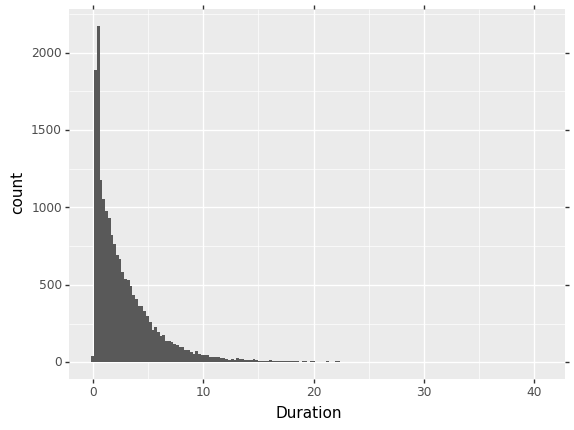

<ggplot: (8762557925685)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 88 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python

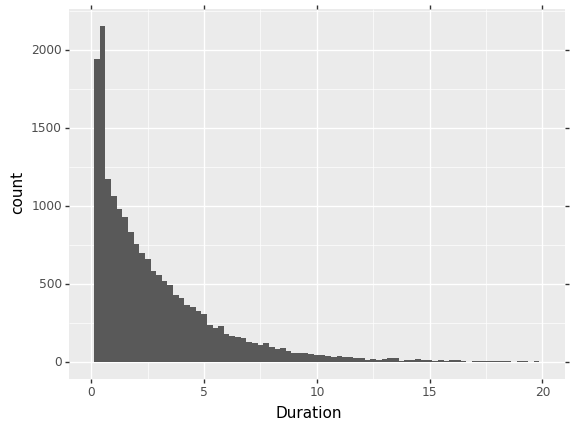

<ggplot: (8762558146693)>

In [55]:
ggplot(durations_df, aes(x="Duration")) + geom_histogram()
# ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot = ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot

In [56]:
lengths_df.sort_values(by='Length', ascending=False)

,Length
14896,196
800,155
15157,151
5688,148
14881,130
14768,123
15169,120
5840,119
2249,117
5653,114


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 200'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


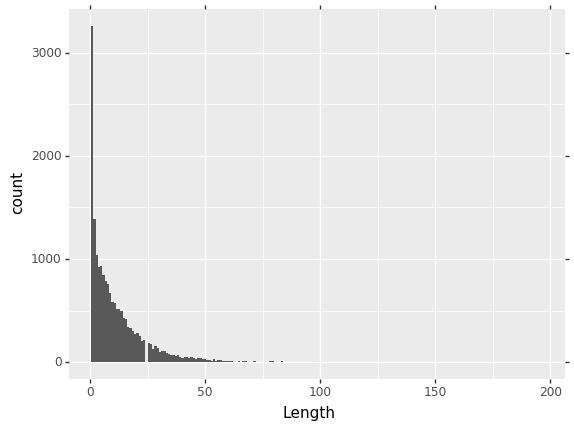

<ggplot: (8762557925649)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 61'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 233 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/pytho

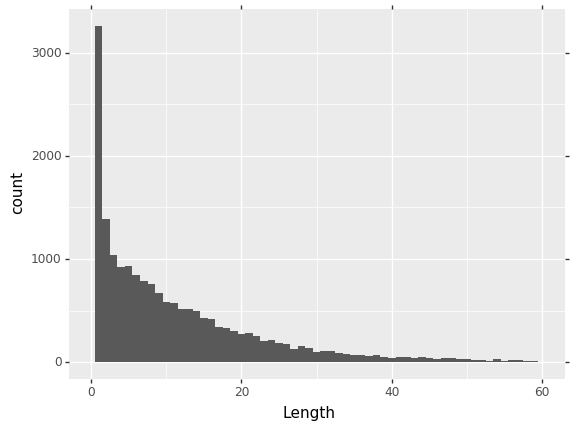

<ggplot: (8762557685961)>

In [57]:
ggplot(lengths_df, aes(x="Length")) + geom_histogram()
# ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot = ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot

# Comparison with Fisher

This assumes you have already conducted an analysis of the Fisher corpus...

In [58]:
# fisher_repo_dir = '/mnt/cube/home/AD/emeinhar/fisher-lm'
print(fisher_repo_dir)

In [59]:
os.chdir(fisher_repo_dir)

In [60]:
%ls *vocab*

fisher_vocabulary_bbn.txt  fisher_vocabulary_main.txt


In [61]:
%cat -n fisher_vocabulary_bbn.txt | head -20

     1	'and
     2	'berserkly'
     3	'bout
     4	'burb
     5	'burban
     6	'burbs
     7	'cau
     8	'cause
     9	'cept
    10	'cide
    11	'cisco
    12	'cize
    13	'course
    14	'cuse
    15	'do
    16	'em
    17	'em's
    18	'ems
    19	'everybody's
    20	'fess
cat: write error: Broken pipe


In [62]:
%cat -n fisher_vocabulary_main.txt | head -20

     1	'and
     2	'berserkly'
     3	'bout
     4	'burb
     5	'burban
     6	'burbs
     7	'cau
     8	'cause
     9	'cept
    10	'cide
    11	'cisco
    12	'cize
    13	'course
    14	'cuse
    15	'do
    16	'em
    17	'em's
    18	'ems
    19	'everybody's
    20	'fess
cat: write error: Broken pipe


In [63]:
fisher_vocab_bbn_fn = 'fisher_vocabulary_bbn.txt'
fisher_vocab_main_fn = 'fisher_vocabulary_main.txt'

In [64]:
fisher_vocab_bbn = []
with open(fisher_vocab_bbn_fn) as file:
    for line in file:
        fisher_vocab_bbn.append(line.rstrip())


fisher_vocab_main = []
with open(fisher_vocab_main_fn) as file:
    for line in file:
        fisher_vocab_main.append(line.rstrip())

In [65]:
len(fisher_vocab_bbn)
len(fisher_vocab_main)

42013

44064

In [66]:
fisher_vocab_bbn = set(fisher_vocab_bbn)
fisher_vocab_main = set(fisher_vocab_main)

In [67]:
def compare_sizes(before, after):
    print("{0} vs. {1}".format(len(before), len(after)))

In [68]:
def normalize_case(vocabulary):
    return set(map(lambda w: w.lower(),
                   vocabulary))

In [69]:
buckeye_vocab = vocabulary_buckeye
buckeye_vocab_lc = set(normalize_case(buckeye_vocab))
fisher_vocab_bbn_lc = set(normalize_case(fisher_vocab_bbn))
fisher_vocab_main_lc = set(normalize_case(fisher_vocab_main))

In [70]:
compare_sizes(buckeye_vocab, buckeye_vocab_lc)
compare_sizes(fisher_vocab_bbn, fisher_vocab_bbn_lc)
compare_sizes(fisher_vocab_main, fisher_vocab_main_lc)

7999 vs. 7999
42013 vs. 42013
44064 vs. 44064


In [71]:
vocab_unique_to_fisher = fisher_vocab_main_lc - buckeye_vocab_lc
len(vocab_unique_to_fisher)

36571

In [72]:
vocab_unique_to_buckeye = buckeye_vocab_lc - fisher_vocab_main_lc
len(vocab_unique_to_buckeye)

506

In [73]:
vocab_unique_to_buckeye

{'aderal',
 "adriatico's",
 'aeronautical',
 'ag',
 'agitation',
 'agler',
 'ails',
 'aline',
 'amazement',
 'ambulation',
 "amy's",
 'analyzes',
 "angela's",
 'angriest',
 'anorism',
 'apologetics',
 'apostolic',
 'appaling',
 'aroma',
 'arranges',
 'auditorially',
 'auditoriums',
 'automating',
 'autoworkers',
 'babysits',
 'backbeats',
 'backstreet',
 'backwater',
 'bainby',
 'ballplayer',
 'baptism',
 'barbarism',
 'bargained',
 'basslines',
 'beatitudes',
 'beechwold',
 'bellbottoms',
 'berth',
 'bethel',
 'bexley',
 'biff',
 'biggin',
 'bioinformatics',
 'blisters',
 'bloodpressure',
 'bons',
 'booklets',
 'borden',
 "borden's",
 'botany',
 'boxspring',
 'brailles',
 'brandenberg',
 'brink',
 'butterball',
 'byrds',
 'c.a.h.s.',
 'cahs',
 'canberra',
 'canvassing',
 'caregivers',
 'carryable',
 'cartoony',
 'carwash',
 'ccd',
 "center'd",
 'cesareans',
 'chants',
 'charleton',
 'chauvinist',
 'cheapskate',
 'check-up',
 'cheetohs',
 'chested',
 'chilicothe',
 'chillers',
 'chocol

In [74]:
buckeye_utterance_relation[0]

{'speaker_name': 's05',
 'speaker_age': 'o',
 'speaker_interviewer': 'f',
 'track_name': 's0501a',
 'speaker_sex': 'f',
 'speech': 'i uh grew up in',
 'speech_rate': 5.078163086223139,
 'end': 41.369375,
 'beg': 40.384767,
 'dur': 0.9846080000000015,
 'has_missing_syllables': False}

In [75]:
def getWordTokens(utterance_rel):
    return tuple(utterance_rel['speech'].split(' '))

getWordTokens(buckeye_utterance_relation[0])

buckeye_word_tokens = tuple(chain.from_iterable(map(getWordTokens,
                                                    buckeye_utterance_relation)))
len(buckeye_word_tokens)

('i', 'uh', 'grew', 'up', 'in')

225669

In [76]:
buckeye_orth_freqs = Counter(buckeye_word_tokens)
buckeye_orth_freqs.most_common()

[('<rem>', 9607),
 ('i', 9418),
 ('and', 8227),
 ('the', 6204),
 ('to', 4889),
 ('a', 4549),
 ('that', 4275),
 ('it', 3520),
 ('like', 3504),
 ('you', 3475),
 ('of', 3091),
 ('yknow', 2847),
 ('they', 2835),
 ('in', 2580),
 ('uh', 2556),
 ("it's", 2292),
 ('but', 2248),
 ('was', 2227),
 ('so', 2035),
 ('yeah', 1994),
 ('just', 1979),
 ("don't", 1722),
 ('um', 1692),
 ('have', 1623),
 ('know', 1484),
 ('is', 1466),
 ('my', 1378),
 ('he', 1375),
 ('think', 1366),
 ('for', 1329),
 ('we', 1326),
 ('do', 1298),
 ('mean', 1214),
 ('or', 1178),
 ('there', 1173),
 ('be', 1159),
 ('on', 1149),
 ('not', 1148),
 ('with', 1136),
 ('because', 1122),
 ('really', 1107),
 ("that's", 1090),
 ('what', 1014),
 ('well', 1000),
 ('people', 985),
 ('if', 981),
 ("i'm", 940),
 ('at', 910),
 ('all', 908),
 ('this', 901),
 ('get', 877),
 ('go', 859),
 ('are', 850),
 ('about', 848),
 ('when', 835),
 ('them', 819),
 ('out', 795),
 ('she', 785),
 ('me', 760),
 ('then', 730),
 ('had', 730),
 ('as', 716),
 ('one', 

In [77]:
buckeye_unique_vocab_by_freq = Counter({w:buckeye_orth_freqs[w] for w in vocab_unique_to_buckeye})
buckeye_unique_vocab_by_freq.most_common()

[('yknow', 2847),
 ('hafta', 52),
 ('mm-hmm', 41),
 ('northland', 19),
 ('clintonville', 15),
 ('hum-um', 15),
 ("u's", 9),
 ('meijer', 9),
 ('grandview', 7),
 ('olentangy', 7),
 ('hilliard', 7),
 ('useta', 6),
 ('cosi', 5),
 ('wexner', 5),
 ('jalena', 4),
 ('jansen', 4),
 ('fatherly', 4),
 ('bethel', 4),
 ('jedd', 3),
 ('webbing', 3),
 ('scooney', 3),
 ('developers', 3),
 ('otterbein', 3),
 ('steubenville', 3),
 ('inalienable', 3),
 ('cheapskate', 3),
 ('vestibules', 3),
 ('tallow', 3),
 ('sunbury', 3),
 ('femalee', 3),
 ('pokedex', 3),
 ('hilltop', 2),
 ('twizzlers', 2),
 ('whetstone', 2),
 ('wyandot', 2),
 ('botany', 2),
 ('chauvinist', 2),
 ('micron', 2),
 ('orangello', 2),
 ("cosi's", 2),
 ('sermon', 2),
 ('reload', 2),
 ('jocks', 2),
 ('manwich', 2),
 ('paterno', 2),
 ('mindboggling', 2),
 ('decoder', 2),
 ('vesture', 2),
 ('lateral', 2),
 ('rewrote', 2),
 ('desalles', 2),
 ('geezy', 2),
 ('tarzan', 2),
 ('ural', 2),
 ("doty's", 2),
 ('cuyahoga', 2),
 ('bloodpressure', 2),
 ('lem

There's nothing too concerning here...

# Speaker statistics

We want to know, for each speaker,
 - the speaker's distribution over utterance speech rates

In [78]:
speaker_names = tuple(sorted(set(map(lambda bur: bur['speaker_name'], buckeye_utterance_relation))))
print(speaker_names)

('s01', 's02', 's03', 's04', 's05', 's06', 's07', 's09', 's10', 's12', 's15', 's16', 's17', 's18', 's19', 's21', 's24', 's26', 's27', 's28', 's29', 's30', 's31', 's34', 's35', 's36', 's37', 's38', 's39', 's40')


In [79]:
def get_speaker_utterances(speaker_name):
    return tuple([bur for bur in buckeye_utterance_relation if bur['speaker_name'] == speaker_name])

def get_speech_rates(speaker_name):
    my_utts = get_speaker_utterances(speaker_name)
    return {u['speech_rate'] for u in my_utts}

bur_s01 = get_speaker_utterances('s01')
len(bur_s01)
bur_s01[0]
tuple(get_speech_rates('s01'))[:10]

453

{'speaker_name': 's01',
 'speaker_age': 'y',
 'speaker_interviewer': 'f',
 'track_name': 's0101a',
 'speaker_sex': 'f',
 'speech': 'okay',
 'speech_rate': 2.4662737070560024,
 'end': 32.622045,
 'beg': 32.216575,
 'dur': 0.4054700000000011,
 'has_missing_syllables': False}

(0.0,
 1.961211165567458,
 2.2620084372914775,
 2.4662737070560024,
 4.452732981025359,
 5.2114182173141606,
 3.09622686054208,
 4.993007207319822,
 4.85607602348884,
 4.8562033461030225)

In [80]:
speech_rate_dl = [{'speaker_name':sn,
                    'speaker_id':int(sn[1:]),
                    'speaker_age':bur['speaker_age'],
                    'speaker_sex':bur['speaker_sex'],
                    'speaker_interviewer':bur['speaker_interviewer'],
                    'speech_rate':bur['speech_rate'],
                    'has_missing_syllables':bur['has_missing_syllables']}
                   for sn in speaker_names for bur in get_speaker_utterances(sn)]
speech_rate_df = pd.DataFrame(speech_rate_dl)
speech_rate_df.info()
speech_rate_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18771 entries, 0 to 18770
Data columns (total 7 columns):
speaker_name             18771 non-null object
speaker_id               18771 non-null int64
speaker_age              18771 non-null object
speaker_sex              18771 non-null object
speaker_interviewer      18771 non-null object
speech_rate              18771 non-null float64
has_missing_syllables    18771 non-null bool
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 898.3+ KB


,speaker_name,speaker_id,speaker_age,speaker_sex,speaker_interviewer,speech_rate,has_missing_syllables
0,s01,1,y,f,f,2.466274,False
1,s01,1,y,f,f,2.263747,True
2,s01,1,y,f,f,4.452733,True
3,s01,1,y,f,f,2.262008,False
4,s01,1,y,f,f,3.096227,False


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


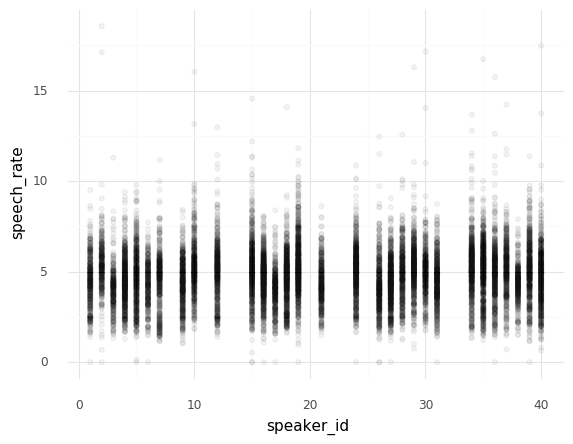

<ggplot: (8762558162661)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


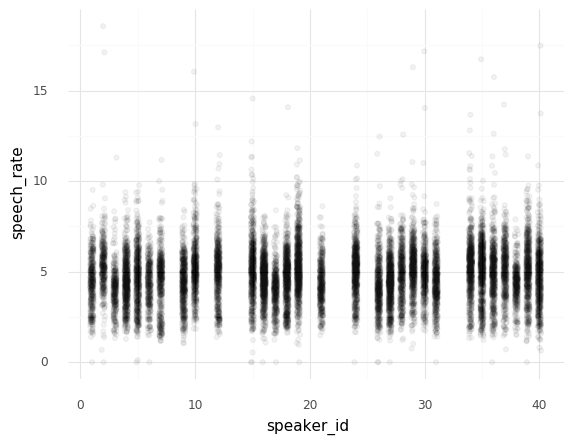

<ggplot: (8762553149785)>

In [81]:
ggplot(speech_rate_df, aes(x='speaker_id', y='speech_rate')) + geom_point(alpha=0.05) + theme_minimal()
ggplot(speech_rate_df, aes(x='speaker_id', y='speech_rate')) + geom_jitter(alpha=0.05, height=None, width=0.15) + theme_minimal()

In [82]:
speech_rate_df_groupped = speech_rate_df.groupby(['speaker_name', 'speaker_id'])
# speech_rate_df_groupped.head()
speech_rate_df_groupped_agged = speech_rate_df_groupped.agg(mean_sr=pd.NamedAgg(column='speech_rate', aggfunc='mean'),
                                                            var_sr=pd.NamedAgg(column='speech_rate', aggfunc='var'),
                                                            std_sr=pd.NamedAgg(column='speech_rate', aggfunc='std'))
# speech_rate_df_groupped_agged.head()
speech_rate_df_groupped_agged = speech_rate_df_groupped_agged.reset_index()
speech_rate_df_groupped_agged['2𝛔'] = 2 * speech_rate_df_groupped_agged['std_sr']
speech_rate_df_groupped_agged['2.5𝛔'] = 2.5 * speech_rate_df_groupped_agged['std_sr']
speech_rate_df_groupped_agged['3𝛔'] = 3 * speech_rate_df_groupped_agged['std_sr']
speech_rate_df_groupped_agged.head()

,speaker_name,speaker_id,mean_sr,var_sr,std_sr,2𝛔,2.5𝛔,3𝛔
0,s01,1,4.456794,1.876497,1.369853,2.739706,3.424632,4.109559
1,s02,2,5.352837,2.268633,1.506198,3.012397,3.765496,4.518595
2,s03,3,4.040721,1.352801,1.163100,2.326200,2.907750,3.489300
3,s04,4,4.466670,1.577802,1.256106,2.512212,3.140265,3.768318
4,s05,5,4.653717,2.428770,1.558451,3.116902,3.896128,4.675353


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


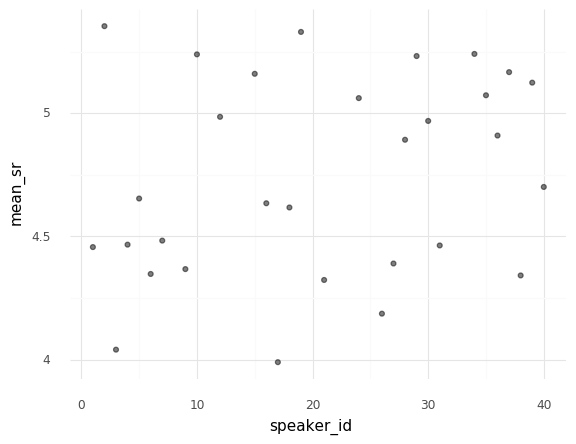

<ggplot: (8762557706709)>

In [83]:
ggplot(speech_rate_df_groupped_agged, aes(x='speaker_id', y='mean_sr')) + geom_point(alpha=0.5) + theme_minimal()

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


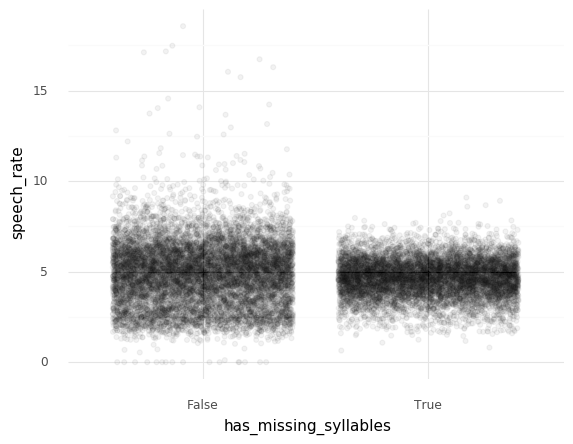

<ggplot: (8762555515205)>

In [84]:
# ggplot(speech_rate_df, aes(x='has_missing_syllables', y='speech_rate')) + geom_point(alpha=0.05) + theme_minimal()
ggplot(speech_rate_df, aes(x='has_missing_syllables', y='speech_rate')) + geom_jitter(alpha=0.05, height=None) + theme_minimal()

,speaker_name,speaker_id,speaker_age,speaker_sex,speaker_interviewer,speech_rate,has_missing_syllables
0,s01,1,y,f,f,2.466274,False
1,s01,1,y,f,f,2.263747,True
2,s01,1,y,f,f,4.452733,True
3,s01,1,y,f,f,2.262008,False
4,s01,1,y,f,f,3.096227,False


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


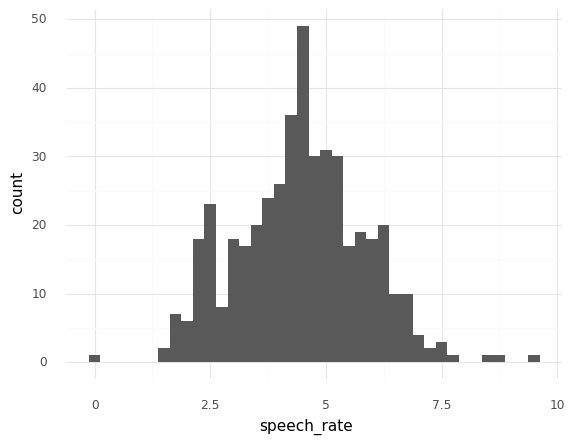

<ggplot: (8762555402885)>

In [85]:
s01speech_rate_df = speech_rate_df_groupped.get_group(('s01', 1))
s01speech_rate_df.head()
ggplot(s01speech_rate_df, aes(x='speech_rate')) + geom_histogram(binwidth=0.25) + theme_minimal()

In [141]:
speech_rate_df_no_missing_sylls = speech_rate_df.loc[ speech_rate_df['has_missing_syllables'] == False ]
speech_rate_df_no_missing_sylls.info()

speech_rate_df_no_missing_sylls_groupped = speech_rate_df_no_missing_sylls.groupby(['speaker_name', 'speaker_id'])
speech_rate_df_nms_groupped_agged = speech_rate_df_no_missing_sylls_groupped.agg(mean_sr=pd.NamedAgg(column='speech_rate', aggfunc='mean'),
                                                            var_sr=pd.NamedAgg(column='speech_rate', aggfunc='var'),
                                                            std_sr=pd.NamedAgg(column='speech_rate', aggfunc='std'))
# speech_rate_df_groupped_agged.head()
speech_rate_df_nms_groupped_agged = speech_rate_df_nms_groupped_agged.reset_index()
speech_rate_df_nms_groupped_agged['2𝛔'] = 2 * speech_rate_df_nms_groupped_agged['std_sr']
speech_rate_df_nms_groupped_agged['2.5𝛔'] = 2.5 * speech_rate_df_nms_groupped_agged['std_sr']
speech_rate_df_nms_groupped_agged['3𝛔'] = 3 * speech_rate_df_nms_groupped_agged['std_sr']
speech_rate_df_nms_groupped_agged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10274 entries, 0 to 18770
Data columns (total 7 columns):
speaker_name             10274 non-null object
speaker_id               10274 non-null int64
speaker_age              10274 non-null object
speaker_sex              10274 non-null object
speaker_interviewer      10274 non-null object
speech_rate              10274 non-null float64
has_missing_syllables    10274 non-null bool
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 571.9+ KB


,speaker_name,speaker_id,mean_sr,var_sr,std_sr,2𝛔,2.5𝛔,3𝛔
0,s01,1,4.458312,2.453363,1.566322,3.132643,3.915804,4.698965
1,s02,2,5.530686,3.632635,1.905947,3.811894,4.764868,5.717842
2,s03,3,4.173686,2.350047,1.532986,3.065972,3.832466,4.598959
3,s04,4,4.619987,2.185518,1.478350,2.956699,3.695874,4.435049
4,s05,5,4.860836,3.739643,1.933816,3.867631,4.834539,5.801447


In [142]:
speech_rate_agg_info = speech_rate_df_nms_groupped_agged.to_dict()
# speech_rate_agg_info = speech_rate_df_groupped_agged.to_dict()
set(speech_rate_agg_info.keys())
print(speech_rate_agg_info['speaker_id'])

{'2.5𝛔',
 '2𝛔',
 '3𝛔',
 'mean_sr',
 'speaker_id',
 'speaker_name',
 'std_sr',
 'var_sr'}

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 9, 8: 10, 9: 12, 10: 15, 11: 16, 12: 17, 13: 18, 14: 19, 15: 21, 16: 24, 17: 26, 18: 27, 19: 28, 20: 29, 21: 30, 22: 31, 23: 34, 24: 35, 25: 36, 26: 37, 27: 38, 28: 39, 29: 40}


In [143]:
num_rows = len(speech_rate_agg_info['speaker_id'])
speech_rate_info = [{k:speech_rate_agg_info[k][r]
                     for k in ('speaker_name', 'speaker_id', 'mean_sr', 'var_sr', 'std_sr', '2𝛔', '2.5𝛔', '3𝛔')}
                    for r in range(num_rows)]
speech_rate_info[0]

{'speaker_name': 's01',
 'speaker_id': 1,
 'mean_sr': 4.458311556679646,
 'var_sr': 2.4533633272619197,
 'std_sr': 1.5663215912646802,
 '2𝛔': 3.1326431825293604,
 '2.5𝛔': 3.9158039781617004,
 '3𝛔': 4.6989647737940405}

In [88]:
#FIXME export speech_rate_info

# Making a word relation for confusability analysis

In [89]:
buckeye_utterance_relation[0]

{'speaker_name': 's05',
 'speaker_age': 'o',
 'speaker_interviewer': 'f',
 'track_name': 's0501a',
 'speaker_sex': 'f',
 'speech': 'i uh grew up in',
 'speech_rate': 5.078163086223139,
 'end': 41.369375,
 'beg': 40.384767,
 'dur': 0.9846080000000015,
 'has_missing_syllables': False}

For each speech word token in the corpus, we want
 - the orthographic wordform
 - the IPA phonemic transcription
 - the IPA phone transcription
 - whether the phone transcription contains any vowels or syllabic consonants
 - all preceding wordforms in the (processed) utterance
 - the 4 preceding orthographic wordforms in the (processed) utterance
 - whether the word is adjacent to any disfluencies, pauses, or filled pauses
 - whether the word is utterance-initial or utterance-final
 - whether the word begins or ends with a clitic
 - the duration.
 
We also want 
 - the track and speaker track name
 - the speaker metadata (ID, age, and sex)
 - the interviewer metadata
 - some other metadata natively associated with words by `buckeye` (beginning, end, misaligned flag, POS, number of syllables).

In [90]:
"yknow" in vocabulary_buckeye

True

In [91]:
clitic_suffixes = {"n't", "'ve", "'ll", "'s", "s'","'d", "'re", "'m", "'em", "'d've"}

In [92]:
words_with_clitic_suffix = {w for w in vocabulary_buckeye 
                            if any({suff in w for suff in clitic_suffixes})}
len(vocabulary_buckeye)
len(words_with_clitic_suffix)
len(words_with_clitic_suffix - {w for w in words_with_clitic_suffix
                                if "'s" in w})

7999

294

71

In [93]:
words_with_clitic_suffix - {w for w in words_with_clitic_suffix if "'s" in w}

{"'em",
 "ain't",
 "aren't",
 "can't",
 "center'd",
 "citizens'",
 "could've",
 "couldn't",
 "didn't",
 "doesn't",
 "don't",
 "guys'",
 "hadn't",
 "hasn't",
 "haven't",
 "he'd",
 "he'll",
 "hook'em",
 "how'd",
 "i'd",
 "i'll",
 "i'm",
 "i've",
 "isn't",
 "it'd",
 "it'll",
 "kids'",
 "kids'll",
 "might've",
 "parents'",
 "people've",
 "peoples'",
 "she'd",
 "she'll",
 "should've",
 "shouldn't",
 "somebody'll",
 "that'd",
 "that'll",
 "that've",
 "there'd",
 "there'll",
 "there're",
 "there've",
 "they'd",
 "they'll",
 "they're",
 "they've",
 "this'll",
 "veterans'",
 "wasn't",
 "we'd",
 "we'll",
 "we're",
 "we've",
 "weren't",
 "what'd",
 "what'll",
 "what're",
 "where'd",
 "where're",
 "who'll",
 "who've",
 "why'd",
 "won't",
 "would've",
 "wouldn't",
 "you'd",
 "you'll",
 "you're",
 "you've"}

In [94]:
len({w for w in vocabulary_buckeye if "'" in w and w[-2:] != "'s"})
{w for w in vocabulary_buckeye if "'" in w and w[-2:] != "'s"}

74

{"'em",
 "ain't",
 "aren't",
 "can't",
 "center'd",
 "citizens'",
 "could've",
 "couldn't",
 "didn't",
 "doesn't",
 "don't",
 "guys'",
 "hadn't",
 "hasn't",
 "haven't",
 "he'd",
 "he'll",
 "hook'em",
 "how'd",
 "i'd",
 "i'll",
 "i'm",
 "i've",
 "isn't",
 "it'd",
 "it'll",
 "kids'",
 "kids'll",
 "might've",
 "o'brien",
 "o'clock",
 "o'hare",
 "parents'",
 "people've",
 "peoples'",
 "she'd",
 "she'll",
 "should've",
 "shouldn't",
 "somebody'll",
 "that'd",
 "that'll",
 "that've",
 "there'd",
 "there'll",
 "there're",
 "there've",
 "they'd",
 "they'll",
 "they're",
 "they've",
 "this'll",
 "veterans'",
 "wasn't",
 "we'd",
 "we'll",
 "we're",
 "we've",
 "weren't",
 "what'd",
 "what'll",
 "what're",
 "where'd",
 "where're",
 "who'll",
 "who've",
 "why'd",
 "won't",
 "would've",
 "wouldn't",
 "you'd",
 "you'll",
 "you're",
 "you've"}

In [95]:
def hasClitic(orthographic_wordform_token):
    w = orthographic_wordform_token
    return w == "yknow" or w in words_with_clitic_suffix

In [247]:
{seg:buckeyeToUnicodeIPA(seg)
 for seg in b.containers.SYLLABIC}
seyfarth_syllabic_segs = set({seg:buckeyeToUnicodeIPA(seg)
                              for seg in b.containers.SYLLABIC}.values())
len(seyfarth_syllabic_segs)
print(seyfarth_syllabic_segs)

{'ehn': 'ɛ̃',
 'iy': 'i',
 'aen': 'æ̃',
 'ay': 'aɪ',
 'ayn': 'ãɪ̃',
 'ao': 'ɔ',
 'eh': 'ɛ',
 'uw': 'u',
 'ae': 'æ',
 'ihn': 'ɪ̃',
 'eng': 'ŋ̩',
 'oy': 'ɔɪ',
 'en': 'n̩',
 'em': 'm̩',
 'own': 'õʊ̃',
 'er': 'ɚ',
 'awn': 'ãʊ̃',
 'iyn': 'ĩ',
 'aon': 'ɔ̃',
 'eyn': 'ẽɪ̃',
 'ahn': 'ʌ̃',
 'aan': 'ɑ̃',
 'uwn': 'ũ',
 'oyn': 'ɔ̃ɪ̃',
 'ih': 'ɪ',
 'ey': 'eɪ',
 'uh': 'ʊ',
 'aa': 'ɑ',
 'ow': 'oʊ',
 'el': 'l̩',
 'uhn': 'ʊ̃',
 'ah': 'ʌ',
 'aw': 'aʊ'}

33

{'l̩', 'ɪ̃', 'ãʊ̃', 'eɪ', 'ɔ', 'ɚ', 'ɛ̃', 'æ', 'ĩ', 'aʊ', 'u', 'ʊ̃', 'ɪ', 'm̩', 'i', 'ʊ', 'æ̃', 'aɪ', 'ŋ̩', 'oʊ', 'n̩', 'ɔ̃ɪ̃', 'ɔɪ', 'ũ', 'ɛ', 'õʊ̃', 'ɔ̃', 'ɑ', 'ɑ̃', 'ẽɪ̃', 'ʌ̃', 'ʌ', 'ãɪ̃'}


In [248]:
vowelsAndSyllabicConsanants = (
 'ʊ',
 'ʌ̃',
 'n̩',
 'aʊ',
 'ɚ',
 'oʊ',
 'ɔ',
 'ʌ',
 'ẽɪ̃',
 'oʊ',
 'ũ',
 'ʌ',
 'ʊ̃',
 'aʊ',
 'ʌ̃',
 'aɪ',
 'æ̃',
 'eɪ',
 'ɚ',
 'ɪ',
 'aɪ',
 'l̩',
 'u',
 'i',
 'ɪ̃',
 'ĩ',
 'ɑ̃',
 'ɔɪ',
 'ɔ̃',
 'ɪ',
 'u',
 'æ',
 'm̩',
 'ɛ̃',
 'ɪ',
 'ɑ',
 'ɔɪ',
 'i',
 'ɛ')
len(vowelsAndSyllabicConsanants)
len(set(vowelsAndSyllabicConsanants))
seyfarth_syllabic_segs - set(vowelsAndSyllabicConsanants) 
set(vowelsAndSyllabicConsanants) - seyfarth_syllabic_segs

#just use the set seyfarth identified
vowelsAndSyllabicConsonants = seyfarth_syllabic_segs

39

28

{'ãɪ̃', 'ãʊ̃', 'õʊ̃', 'ŋ̩', 'ɔ̃ɪ̃'}

set()

In [97]:
s = "it's just music by different groups it's you know things you you wouldn't you wouldn't uh"
ws = s.split(' ')
len(ws)
i = 3
j = 8

ws[j]
ws[j-4 if j-4 > 0 else 0:j]

ws[i]
ws[i-4 if i-4 > 0 else 0:i]

def get_ngram_context(word_seq, i, n=None):
    if n is None:
        n = 4
    assert n > 0
    assert i > -1
    assert i < len(word_seq)
    return word_seq[i-n if i-n > 0 else 0:i]

get_ngram_context(ws, 8)
get_ngram_context(ws, 3)

def get_ngram_contexts(word_seq, n=None):
    if n is None:
        n = 4
    assert n > 0
    return tuple(map(lambda i: get_ngram_context(word_seq, i),
                     range(len(word_seq))))

def get_all_prefixes(word_seq):
    return [word_seq[0:i] for i in range(len(word_seq)+1)]

def get_all_contexts(word_seq):
    return get_all_prefixes(word_seq)[:-1]

get_ngram_contexts(ws)
get_all_contexts(ws)

16

'know'

['different', 'groups', "it's", 'you']

'by'

["it's", 'just', 'music']

['different', 'groups', "it's", 'you']

["it's", 'just', 'music']

([],
 ["it's"],
 ["it's", 'just'],
 ["it's", 'just', 'music'],
 ["it's", 'just', 'music', 'by'],
 ['just', 'music', 'by', 'different'],
 ['music', 'by', 'different', 'groups'],
 ['by', 'different', 'groups', "it's"],
 ['different', 'groups', "it's", 'you'],
 ['groups', "it's", 'you', 'know'],
 ["it's", 'you', 'know', 'things'],
 ['you', 'know', 'things', 'you'],
 ['know', 'things', 'you', 'you'],
 ['things', 'you', 'you', "wouldn't"],
 ['you', 'you', "wouldn't", 'you'],
 ['you', "wouldn't", 'you', "wouldn't"])

[[],
 ["it's"],
 ["it's", 'just'],
 ["it's", 'just', 'music'],
 ["it's", 'just', 'music', 'by'],
 ["it's", 'just', 'music', 'by', 'different'],
 ["it's", 'just', 'music', 'by', 'different', 'groups'],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's"],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's", 'you'],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's", 'you', 'know'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't"],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'kno

In [ ]:
#this should really be based on the utterance as cleaned up and shoved into the 

In [220]:
def word_relation(w, local_orth_context, full_orth_context, words_in_utterance):
    left_obj, right_obj = get_adjacent_wordObjs(w, words_in_utterance)
    r = {'orthographic_wordform':get_orthography(w),
         'preceding_4_wordforms':local_orth_context,
         'preceding_3_wordforms':local_orth_context[1:],
         'preceding_2_wordforms':local_orth_context[2:],
         'preceding_1_wordforms':local_orth_context[3:],
         'preceding_wordforms':full_orth_context,
         'POS':w.pos,
         'phonemes':get_phonemes(w),
         'phones':get_phones(w),
         'hasSyllabicSegsInPhones':any([s in get_phones(w) for s in vowelsAndSyllabicConsanants]),
#          'hasAdjacentPauseOrDisfluency':hasAdjacentPauseOrDisfluency(w, words_in_utterance),
         'hasAdjacentPauseOrDisfluency':hasAdjacentPauseOrDisfluency(left_obj, right_obj),
#          'hasAdjacentFilledPause':hasAdjacentFilledPause(w, words_in_utterance),
         'hasAdjacentFilledPause':hasAdjacentFilledPause(left_obj, right_obj),
         'hasClitic':hasClitic(get_orthography(w)),
         'syllables':w.syllables(),
         'beg':w.beg,
         'end':w.end,
         'duration':w.dur,
         'misalgined':w.misaligned}
    return r

def get_adjacent_wordObjs(key_wordObj, raw_wordObjs):
    raw_indices = range(len(raw_wordObjs))
    key_indices = [j for j,w in enumerate(raw_wordObjs) if w == key_wordObj]
    assert len(key_indices) > 0, 'key_wordObj not in raw_wordObjs:\n\tkey: {0}\n\traw_wordObjs:{1}'.format(key_wordObj, raw_wordObjs)
    assert len(key_indices) == 1, 'key_wordObj occurs more than once in raw_wordObjs:\n\t:: {0}\n\traw_wordObjs:{1}'.format(key_wordObj, raw_wordObjs)
    key_index = key_indices[0]
    left_index, right_index = key_index - 1, key_index + 1
    if left_index < 0:
        left_obj = None
    else:
        left_obj = raw_wordObjs[left_index]
    if right_index > len(raw_wordObjs) - 1:
        right_obj = None
    else:
        right_obj = raw_wordObjs[right_index]
    return left_obj, right_obj

# def hasAdjacentPauseOrDisfluency(key_wordObj, raw_wordObjs):
#     left_obj, right_obj = get_adjacent_wordObjs(key_wordObj, raw_wordObjs)
def hasAdjacentPauseOrDisfluency(left_obj, right_obj):
    if left_obj is not None:
        if not isWord(left_obj):
            return True
    if right_obj is not None:
        if not isWord(right_obj):
            return True
    return False

# def hasAdjacentFilledPause(key_wordObj, raw_wordObjs):
#     left_obj, right_obj = get_adjacent_wordObjs(key_wordObj, raw_wordObjs)
def hasAdjacentFilledPause(left_obj, right_obj):
    if left_obj is not None:
        if isWord(left_obj):
            return isFilledPause(left_obj)
    if right_obj is not None:
        if isWord(right_obj):
            return isFilledPause(right_obj)
    return False

def utterance_to_word_relations(s, t, u):
    speaker_rel = speaker_relation(s)
    track_rel = track_relation(t)
    utt_rel = utterance_relation(u)
    metadata = {'track_name':track_rel['track_name'],
                'speaker_name':speaker_rel['speaker_name'],
                'speaker_age':speaker_rel['speaker_age'],
                'speaker_sex':speaker_rel['speaker_sex'],
                'speaker_interviewer':speaker_rel['speaker_interviewer'],
                'speech_rate':utt_rel['speech_rate']}
    Ws_raw = u.words
    Ws = [w for w in u.words if isWord(w)]
    local_contexts = get_ngram_contexts(utt_rel['speech'].split(' '))
    full_contexts = get_all_contexts(utt_rel['speech'].split(' '))
#     assert len(local_contexts) == len(Ws_raw), '|local contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tLCs:{3}'.format(len(local_contexts), len(Ws_raw), Ws_raw, local_contexts)
#     assert len(full_contexts) == len(Ws_raw), '|full contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tLCs:{3}'.format(len(full_contexts), len(Ws_raw), Ws_raw, full_contexts)
    
    make_word_rel = lambda w, l, f: word_relation(w, l ,f , Ws_raw)
    w_rels = list(starmap(make_word_rel, 
                          zip(Ws, local_contexts, full_contexts)))
    w_rels = list(map(lambda wr: dictionary_product(wr, metadata),
                      w_rels))
    for i, w_rel in enumerate(w_rels):
        w_rel.update({'dist_from_left_edge':i})
        w_rel.update({'dist_from_right_edge':len(w_rels)-i-1})
    return w_rels

In [221]:
s0 = speakers[0]; s0
t0 = s0.tracks[0]; t0
utts_t0 = get_utterances(t0); utts_t0[:3]
u0 = utts_t0[0]; u0
' '
utterance_to_word_relations(s0, t0, u0)

Speaker("s05")

Track("s0501a")

[Utterance([Word('i', 40.384767, 40.735815, ['ay'], ['ay'], 'PRP'), Word('uh', 40.735815, 40.906827, ['ah'], ['ah'], 'UH'), Word('grew', 40.906827, 41.130238, ['g', 'r', 'uw'], ['g', 'r', 'uw'], 'VBD'), Word('up', 41.130238, 41.284995, ['ah', 'p'], ['ah', 'p'], 'RP'), Word('in', 41.284995, 41.369375, ['ih', 'n'], ['ih', 'n'], 'IN')]),
 Utterance([Word('is', 42.087948, 42.194687, ['ih', 'z'], ['ih', 'z'], 'VBZ'), Word('this', 42.194687, 42.357005, ['dh', 'ih', 's'], ['ih', 's'], 'DT'), Word('is', 42.357005, 42.479503, ['ih', 'z'], ['ih', 'z'], 'VBZ'), Word('this', 42.479503, 42.642588, ['dh', 'ih', 's'], ['z', 'ih', 's'], 'DT')]),
 Utterance([Word('because', 43.148661, 43.389994, ['b', 'ih', 'k', 'ah', 'z'], ['k', 'ih', 'z'], 'IN'), Pause('<SIL>', 43.389994, 43.508578), Word('it', 43.508578, 43.611039, ['ih', 't'], ['ih', 't'], 'PRP'), Word('slipped', 43.611039, 44.007683, ['s', 'l', 'ih', 'p', 't'], ['s', 'l', 'ih', 'p', 't'], 'VBD'), Pause('<NOISE-since>', 44.007683, 44.254687), Pause

Utterance([Word('i', 40.384767, 40.735815, ['ay'], ['ay'], 'PRP'), Word('uh', 40.735815, 40.906827, ['ah'], ['ah'], 'UH'), Word('grew', 40.906827, 41.130238, ['g', 'r', 'uw'], ['g', 'r', 'uw'], 'VBD'), Word('up', 41.130238, 41.284995, ['ah', 'p'], ['ah', 'p'], 'RP'), Word('in', 41.284995, 41.369375, ['ih', 'n'], ['ih', 'n'], 'IN')])

' '

[{'duration': 0.3510480000000058,
  'preceding_4_wordforms': [],
  'end': 40.735815,
  'beg': 40.384767,
  'orthographic_wordform': 'i',
  'phones': 'aɪ',
  'syllables': 1,
  'preceding_2_wordforms': [],
  'POS': 'PRP',
  'preceding_1_wordforms': [],
  'hasClitic': False,
  'hasSyllabicSegsInPhones': True,
  'misalgined': False,
  'preceding_wordforms': [],
  'phonemes': 'aɪ',
  'preceding_3_wordforms': [],
  'hasAdjacentFilledPause': True,
  'hasAdjacentPauseOrDisfluency': False,
  'speaker_name': 's05',
  'speaker_age': 'o',
  'speech_rate': 5.078163086223139,
  'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_sex': 'f',
  'dist_from_left_edge': 0,
  'dist_from_right_edge': 4},
 {'duration': 0.1710119999999975,
  'preceding_4_wordforms': ['i'],
  'end': 40.906827,
  'beg': 40.735815,
  'orthographic_wordform': 'uh',
  'phones': 'ʌ',
  'syllables': 1,
  'preceding_2_wordforms': [],
  'POS': 'UH',
  'preceding_1_wordforms': [],
  'hasClitic': False,
  'hasSyllabicSegsIn

In [222]:
# WAS ~12s on wittgenstein
# is now ~2m due to (my poorly implemented) annotations wrt pauses, filled pauses, and disfluencies
buckeye_word_relation = list(chain.from_iterable([utterance_to_word_relations(s,t,u)
                                                  for s in speakers for t in s.tracks for u in get_utterances(t)]))
len(buckeye_word_tokens)
len(buckeye_word_relation)
buckeye_word_relation[:5]

225669

216062

[{'duration': 0.3510480000000058,
  'preceding_4_wordforms': [],
  'end': 40.735815,
  'beg': 40.384767,
  'orthographic_wordform': 'i',
  'phones': 'aɪ',
  'syllables': 1,
  'preceding_2_wordforms': [],
  'POS': 'PRP',
  'preceding_1_wordforms': [],
  'hasClitic': False,
  'hasSyllabicSegsInPhones': True,
  'misalgined': False,
  'preceding_wordforms': [],
  'phonemes': 'aɪ',
  'preceding_3_wordforms': [],
  'hasAdjacentFilledPause': True,
  'hasAdjacentPauseOrDisfluency': False,
  'speaker_name': 's05',
  'speaker_age': 'o',
  'speech_rate': 5.078163086223139,
  'speaker_interviewer': 'f',
  'track_name': 's0501a',
  'speaker_sex': 'f',
  'dist_from_left_edge': 0,
  'dist_from_right_edge': 4},
 {'duration': 0.1710119999999975,
  'preceding_4_wordforms': ['i'],
  'end': 40.906827,
  'beg': 40.735815,
  'orthographic_wordform': 'uh',
  'phones': 'ʌ',
  'syllables': 1,
  'preceding_2_wordforms': [],
  'POS': 'UH',
  'preceding_1_wordforms': [],
  'hasClitic': False,
  'hasSyllabicSegsIn

## Write to file

In [223]:
os.chdir(repo_dir)
os.getcwd()
os.listdir()

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

['buckeye_contexts_fourgram.txt',
 'Preprocessing Buckeye corpus transcriptions for ease of processing and use with kenlm.ipynb',
 'buckeye_contexts_unigram.txt',
 'Converting Buckeye Transcriptions to Unicode IPA symbols.ipynb',
 '.gitignore',
 'buckeye_contexts.txt',
 '.ipynb_checkpoints',
 'buckeye_utterances_relation.json',
 'buckeye_contexts_trigram.txt',
 'README.md',
 'buckeye_vocabulary.txt',
 'buckeye_contexts_bigram.txt',
 'buckeye_orthography_phonemic_relation.tsv',
 'buckeye_words_analysis_relation.json',
 '.git',
 'buckeye_utterances.txt']

In [224]:
buckeye_words_analysis_relation_fn = 'buckeye_words_analysis_relation.json'

buckeye_words_analysis_relation_path = os.path.join(repo_dir, buckeye_words_analysis_relation_fn)

#~60s on wittgenstein
with open(buckeye_words_analysis_relation_path, 'w', encoding='utf8') as json_file:
    json.dump(buckeye_word_relation, json_file, indent=1, ensure_ascii=False, sort_keys=True)

In [225]:
%cat -n buckeye_words_analysis_relation.json | head -60

     1	[
     2	 {
     3	  "duration": 0.3510480000000058,
     4	  "preceding_4_wordforms": [],
     5	  "end": 40.735815,
     6	  "beg": 40.384767,
     7	  "orthographic_wordform": "i",
     8	  "phones": "aɪ",
     9	  "syllables": 1,
    10	  "preceding_2_wordforms": [],
    11	  "POS": "PRP",
    12	  "preceding_1_wordforms": [],
    13	  "hasClitic": false,
    14	  "hasSyllabicSegsInPhones": true,
    15	  "misalgined": false,
    16	  "preceding_wordforms": [],
    17	  "phonemes": "aɪ",
    18	  "preceding_3_wordforms": [],
    19	  "hasAdjacentFilledPause": true,
    20	  "hasAdjacentPauseOrDisfluency": false,
    21	  "speaker_name": "s05",
    22	  "speaker_age": "o",
    23	  "speech_rate": 5.078163086223139,
    24	  "speaker_interviewer": "f",
    25	  "track_name": "s0501a",
    26	  "speaker_sex": "f",
    27	  "dist_from_left_edge": 0,
    28	  "dist_from_right_edge": 4
    29	 },
    30	 {
    31	  "duration": 0.1710119999999975,
    32	  "preceding_4_wordforms": 

# Word type statistics

We want to know, for each word type,
 - the word's distribution over durations

In [226]:
orth_words = set(map(lambda bwr: bwr['orthographic_wordform'],
                     buckeye_word_relation))

In [105]:
#FIXME all orthographic words should be lowercased in the buckeye word relation...

orth_words == buckeye_vocab
orth_words - buckeye_vocab
buckeye_vocab - orth_words

False

{'Ellimen', 'Ellison', 'Ralph'}

{'<rem>', 'ellimen', 'ellison', 'ralph'}

In [106]:
from funcy import omit

In [107]:
def orth_word_to_instances(orth_word):
    return tuple(bwr for bwr in buckeye_word_relation if bwr['orthographic_wordform'] == orth_word)

accident_bwrs = orth_word_to_instances('accident')
len(accident_bwrs)
accident_bwrs[0]

def my_bwr_filter(bwr):
    return omit(bwr, ('beg', 'end', 'phones', 'phonemes',
                      'preceding_wordforms', 'preceding_4_wordforms', 'preceding_3_wordforms', 
                      'speaker_interviewer', 'track_name'))
my_bwr_filter(accident_bwrs[0])

7

{'duration': 0.5199999999999818,
 'preceding_4_wordforms': ['is', 'a', 'is', 'an'],
 'end': 478.071625,
 'beg': 477.551625,
 'orthographic_wordform': 'accident',
 'phones': 'æ.k.s.ɪ.d.ɛ.n',
 'syllables': 3,
 'POS': 'NN',
 'hasClitic': False,
 'hasSyllabicSegsInPhones': True,
 'misalgined': False,
 'preceding_wordforms': ['marketing',
  'is',
  'not',
  'my',
  'strong',
  'suit',
  'i',
  'mean',
  'most',
  'of',
  'the',
  'stuff',
  'that',
  'i',
  'get',
  'is',
  'just',
  'is',
  'a',
  'is',
  'an'],
 'phonemes': 'æ.k.s.ɪ.d.ʌ.n.t',
 'preceding_3_wordforms': ['a', 'is', 'an'],
 'hasAdjacentFilledPause': False,
 'hasAdjacentPauseOrDisfluency': False,
 'speaker_name': 's05',
 'speaker_age': 'o',
 'speech_rate': 5.85711543468619,
 'speaker_interviewer': 'f',
 'track_name': 's0501b',
 'speaker_sex': 'f',
 'dist_from_left_edge': 21,
 'dist_from_right_edge': 31}

{'duration': 0.5199999999999818,
 'orthographic_wordform': 'accident',
 'syllables': 3,
 'POS': 'NN',
 'hasClitic': False,
 'hasSyllabicSegsInPhones': True,
 'misalgined': False,
 'hasAdjacentFilledPause': False,
 'hasAdjacentPauseOrDisfluency': False,
 'speaker_name': 's05',
 'speaker_age': 'o',
 'speech_rate': 5.85711543468619,
 'speaker_sex': 'f',
 'dist_from_left_edge': 21,
 'dist_from_right_edge': 31}

In [108]:
bwr_filtered = tuple(map(my_bwr_filter, buckeye_word_relation))
bwr_filtered_df = pd.DataFrame(bwr_filtered)
bwr_filtered_df.info()
bwr_filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216062 entries, 0 to 216061
Data columns (total 15 columns):
duration                        216062 non-null float64
orthographic_wordform           216062 non-null object
syllables                       216062 non-null int64
POS                             216062 non-null object
hasClitic                       216062 non-null bool
hasSyllabicSegsInPhones         216062 non-null bool
misalgined                      216062 non-null bool
hasAdjacentFilledPause          216062 non-null bool
hasAdjacentPauseOrDisfluency    216062 non-null bool
speaker_name                    216062 non-null object
speaker_age                     216062 non-null object
speech_rate                     216062 non-null float64
speaker_sex                     216062 non-null object
dist_from_left_edge             216062 non-null int64
dist_from_right_edge            216062 non-null int64
dtypes: bool(5), float64(2), int64(3), object(5)
memory usage: 17.5+ MB


,duration,orthographic_wordform,syllables,POS,hasClitic,hasSyllabicSegsInPhones,misalgined,hasAdjacentFilledPause,hasAdjacentPauseOrDisfluency,speaker_name,speaker_age,speech_rate,speaker_sex,dist_from_left_edge,dist_from_right_edge
0,0.351048,i,1,PRP,False,True,False,True,False,s05,o,5.078163,f,0,4
1,0.171012,uh,1,UH,False,True,False,False,False,s05,o,5.078163,f,1,3
2,0.223411,grew,1,VBD,False,True,False,True,False,s05,o,5.078163,f,2,2
3,0.154757,up,1,RP,False,True,False,False,False,s05,o,5.078163,f,3,1
4,0.084380,in,1,IN,False,True,False,False,False,s05,o,5.078163,f,4,0


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


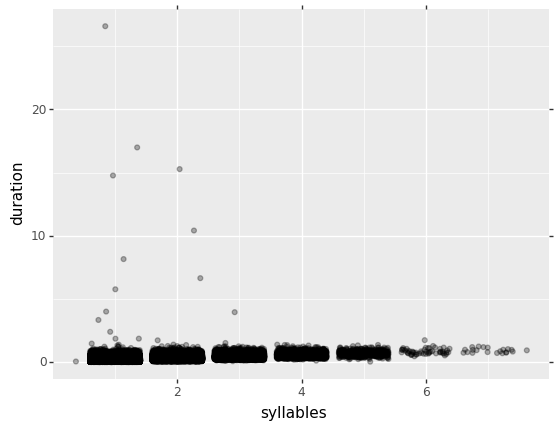

<ggplot: (8762484646265)>

In [118]:
#35.2s on sidious
ggplot(bwr_filtered_df, aes(x='syllables', y='duration')) + geom_jitter(alpha=0.3, height=None)

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 49248 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


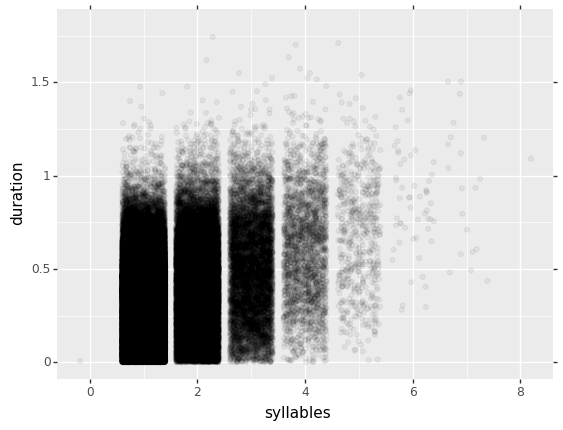

<ggplot: (8762457555517)>

In [129]:
ggplot(bwr_filtered_df, aes(x='syllables', y='duration')) + geom_jitter(alpha=0.05, height=None) + ylim(0,1.8)

In [110]:
bwr_filtered_df_groupped = bwr_filtered_df.groupby(['orthographic_wordform'])
bwr_filtered_df_groupped_agged = bwr_filtered_df_groupped.agg(mean_dur=pd.NamedAgg(column='duration', aggfunc='mean'),
                                                              var_dur=pd.NamedAgg(column='duration', aggfunc='var'),
                                                              std_dur=pd.NamedAgg(column='duration', aggfunc='std'))
bwr_filtered_df_groupped_agged = bwr_filtered_df_groupped_agged.reset_index()
bwr_filtered_df_groupped_agged['2𝛔'] = 2 * bwr_filtered_df_groupped_agged['std_dur']
bwr_filtered_df_groupped_agged['2.5𝛔'] = 2.5 * bwr_filtered_df_groupped_agged['std_dur']
bwr_filtered_df_groupped_agged['3𝛔'] = 3 * bwr_filtered_df_groupped_agged['std_dur']
bwr_filtered_df_groupped_agged.head()
bwr_filtered_df_groupped_agged.tail()

,orthographic_wordform,mean_dur,var_dur,std_dur,2𝛔,2.5𝛔,3𝛔
0,'em,0.172884,NaN,NaN,NaN,NaN,NaN
1,Ellimen,0.332184,0.003490,0.059073,0.118146,0.147683,0.177219
2,Ellison,0.489889,0.005234,0.072343,0.144687,0.180858,0.217030
3,Ralph,0.219799,NaN,NaN,NaN,NaN,NaN
4,a,0.070827,0.002790,0.052824,0.105648,0.132060,0.158472


,orthographic_wordform,mean_dur,var_dur,std_dur,2𝛔,2.5𝛔,3𝛔
7993,zombied,0.447640,NaN,NaN,NaN,NaN,NaN
7994,zone,0.277500,0.002964,0.054447,0.108894,0.136118,0.163342
7995,zone's,0.335452,NaN,NaN,NaN,NaN,NaN
7996,zoo,0.400541,0.018632,0.136500,0.273000,0.341251,0.409501
7997,zoom,0.318500,0.002812,0.053033,0.106066,0.132583,0.159099


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


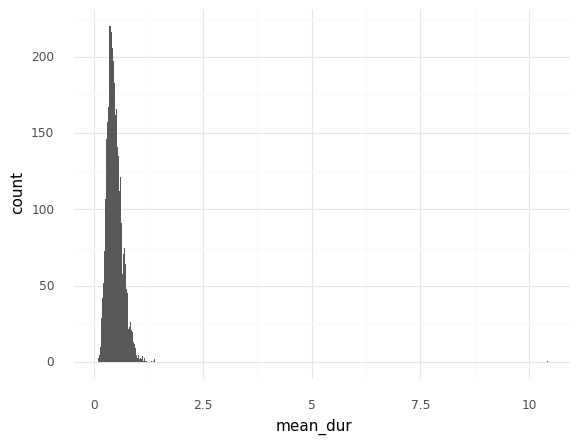

<ggplot: (8762555373029)>

In [114]:
ggplot(bwr_filtered_df_groupped_agged, aes(x='mean_dur')) + geom_histogram(binwidth=0.01) + theme_minimal()

In [122]:
bwr_filtered_df_agg_info = bwr_filtered_df_groupped_agged.to_dict()
set(bwr_filtered_df_agg_info.keys())
len(bwr_filtered_df_agg_info['orthographic_wordform'])

{'2.5𝛔', '2𝛔', '3𝛔', 'mean_dur', 'orthographic_wordform', 'std_dur', 'var_dur'}

7998

In [125]:
num_rows = len(bwr_filtered_df_agg_info['orthographic_wordform'])
bwr_filtered_agg_info = [{k:bwr_filtered_df_agg_info[k][r]
                          for k in ('orthographic_wordform', 'mean_dur', 'var_dur', 'std_dur', '2𝛔', '2.5𝛔', '3𝛔')}
                         for r in range(num_rows)]
bwr_filtered_agg_info[55]

{'orthographic_wordform': 'accord',
 'mean_dur': 0.4511799999999937,
 'var_dur': 7.57188180002915e-05,
 'std_dur': 0.008701656049298402,
 '2𝛔': 0.017403312098596805,
 '2.5𝛔': 0.021754140123246005,
 '3𝛔': 0.02610496814789521}

In [ ]:
#FIXME export bwr_filtered_agg_info

# Applying exclusion criteria to the word relation

In [130]:
buckeye_word_relation[123]

{'duration': 0.33380499999999813,
 'preceding_4_wordforms': ['long', 'way', 'in', 'terms'],
 'end': 101.95429,
 'beg': 101.620485,
 'orthographic_wordform': 'of',
 'phones': 'ʌ.v',
 'syllables': 1,
 'POS': 'IN',
 'hasClitic': False,
 'hasSyllabicSegsInPhones': True,
 'misalgined': False,
 'preceding_wordforms': ["it's",
  '<rem>',
  "it's",
  'changed',
  'a',
  'lot',
  'since',
  "i've",
  'been',
  'here',
  'yknow',
  'i',
  'mean',
  "it's",
  'really',
  'come',
  'a',
  'long',
  'way',
  'in',
  'terms'],
 'phonemes': 'ʌ.v',
 'preceding_3_wordforms': ['way', 'in', 'terms'],
 'hasAdjacentFilledPause': False,
 'hasAdjacentPauseOrDisfluency': True,
 'speaker_name': 's05',
 'speaker_age': 'o',
 'speech_rate': 4.257108631047133,
 'speaker_interviewer': 'f',
 'track_name': 's0501a',
 'speaker_sex': 'f',
 'dist_from_left_edge': 21,
 'dist_from_right_edge': 0}

In [215]:
def exclusionRationale(bwr):
    #is function word
    #is special content word
    #adjecent to disfluency, pause, filled pause
    #utterance initial or utterance final
    #cliticized
    #utterance speech rate is 2.5/3x away from speaker's mean
    #word token duration is 2.5/3x away from word type's mean
    #no vowels or syllabic consonants in close phonetic transcription
    #speaker35
    exclusionCriteria = {#'isFunctionWord':isFunctionWord,
                         #'isSpecialContentWord':isSpecialContentWord,
                         'isAdjacentToDisfluencyPauseOrFilledPause':isAdjacentToDisfluencyPauseOrFilledPause,
                         'isUtteranceInitialOrFinal':isUtteranceInitialOrFinal,
                         'isCliticized':isCliticized,
                         'hasNoSyllabicSegs':hasNoSyllabicSegs,
                         'isSpeaker35':isSpeaker35,
                         'hasExtremeUtteranceSpeechRate':hasExtremeUtteranceSpeechRate,
                         'hasExtremeWordDuration':hasExtremeWordDuration}
    exclusionReasons = {criterion:exclusionCriteria[criterion](bwr)
                        for criterion in exclusionCriteria}
    return exclusionReasons

def exclude(bwr):
    #is function word
    #is special content word
    #adjecent to disfluency, pause, filled pause
    #utterance initial or utterance final
    #cliticized
    #utterance speech rate is 2.5/3x away from speaker's mean
    #word token duration is 2.5/3x away from word type's mean
    #no vowels or syllabic consonants in close phonetic transcription
    #speaker35
    exclusionCriteria = (#isFunctionWord,
                         #isSpecialContentWord,
                         isAdjacentToDisfluencyPauseOrFilledPause,
                         isUtteranceInitialOrFinal,
                         isCliticized,
                         hasNoSyllabicSegs,
                         isSpeaker35,
                         hasExtremeUtteranceSpeechRate,
                         hasExtremeWordDuration)
    excludable = any(map(lambda f: f(bwr),
                         exclusionCriteria))
    return excludable
    
# def isFunctionWord(bwr):
#     return bwr['POS'] in 
#     return False

# def isSpecialContentWord(bwr):
#     pass

def isAdjacentToDisfluencyPauseOrFilledPause(bwr):
    return bwr['hasAdjacentFilledPause'] or bwr['hasAdjacentPauseOrDisfluency']

def isUtteranceInitialOrFinal(bwr):
    return bwr['dist_from_left_edge'] == 0 or bwr['dist_from_right_edge'] ==0

def isCliticized(bwr):
    return bwr['hasClitic']

def hasNoSyllabicSegs(bwr):
    return not bwr['hasSyllabicSegsInPhones']

def isSpeaker35(bwr):
    return bwr['speaker_name'] == 's35'

def hasExtremeUtteranceSpeechRate(bwr, boundary='3'):
    sr = bwr['speech_rate']
    my_speech_rate_info = [r for r in speech_rate_info 
                           if r['speaker_name'] == bwr['speaker_name']][0]
    speaker_mean = my_speech_rate_info['mean_sr']
    
    ub25 = speaker_mean + my_speech_rate_info['2.5𝛔']
    lb25 = speaker_mean - my_speech_rate_info['2.5𝛔']
    
    ub3 = speaker_mean + my_speech_rate_info['3𝛔']
    lb3 = speaker_mean - my_speech_rate_info['3𝛔']
    
    if boundary == '2.5':
        return not (lb25 < sr < ub25)
    elif boundary == '3':
        return not (lb3 < sr < ub3)
    else:
        raise Exception(f"boundary must be one of '2.5' or '3', got {boundary} instead.")

def hasExtremeWordDuration(bwr, boundary='3'):
    dur = bwr['duration']
    my_word_info = [r for r in bwr_filtered_agg_info
                    if r['orthographic_wordform'] == bwr['orthographic_wordform']][0]
    word_mean = my_word_info['mean_dur']
    
    ub25 = word_mean + my_word_info['2.5𝛔']
    lb25 = word_mean - my_word_info['2.5𝛔']
    
    ub3 = word_mean + my_word_info['3𝛔']
    lb3 = word_mean - my_word_info['3𝛔']
    
    if boundary == '2.5':
        return not (lb25 < dur < ub25)
    elif boundary == '3':
        return not (lb3 < dur < ub3)
    else:
        raise Exception(f"boundary must be one of '2.5' or '3', got {boundary} instead.")

In [149]:
len(buckeye_word_relation)

216062

In [152]:
from itertools import filterfalse

In [216]:
#2m44s on sidious
filtered_buckeye_word_relation = list(filterfalse(exclude, buckeye_word_relation))
len(filtered_buckeye_word_relation) #152226 w/ 2.5 std dev boundaries
len(filtered_buckeye_word_relation) / len(buckeye_word_relation) #0.705 w/ 2.5 std dev boundaries
len(buckeye_word_relation) - len(filtered_buckeye_word_relation) #63836 w/ 2.5 std dev boundaries

128314

0.5938758319371291

87748

In [217]:
filtered_orth_words = set(map(lambda bwr: bwr['orthographic_wordform'],
                              filtered_buckeye_word_relation))
len(orth_words) #7998
len(filtered_orth_words) #4304 w/ 2.5 std dev boundaries
len(filtered_orth_words) / len(orth_words) #0.54 w/ 2.5 std dev boundaries
len(orth_words) - len(filtered_orth_words) #3694 w/ 2.5 std dev boundaries

7998

4157

0.5197549387346837

3841

In [218]:
#3m49s on sidious
exclusion_rationales = list(map(exclusionRationale, buckeye_word_relation))

In [219]:
exclusion_rationales_df = pd.DataFrame(exclusion_rationales)
exclusion_rationales_df.info()
exclusion_rationales_df.head()
exclusion_rationales_df_info = exclusion_rationales_df.to_dict()
exclusion_count = {criterion:Counter(exclusion_rationales_df_info[criterion].values())[True]
                   for criterion in exclusion_rationales_df_info.keys()}
exclusion_count

# w/ 2.5 std dev boundaries:
# {'isAdjacentToDisfluencyPauseOrFilledPause': 37993,
#  'isCliticized': 15546,
#  'hasNoSyllabicSegs': 1788,
#  'isSpeaker35': 8776,
#  'hasExtremeUtteranceSpeechRate': 263,
#  'hasExtremeWordDuration': 8316}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216062 entries, 0 to 216061
Data columns (total 7 columns):
isAdjacentToDisfluencyPauseOrFilledPause    216062 non-null bool
isUtteranceInitialOrFinal                   216062 non-null bool
isCliticized                                216062 non-null bool
hasNoSyllabicSegs                           216062 non-null bool
isSpeaker35                                 216062 non-null bool
hasExtremeUtteranceSpeechRate               216062 non-null bool
hasExtremeWordDuration                      216062 non-null bool
dtypes: bool(7)
memory usage: 1.4 MB


,isAdjacentToDisfluencyPauseOrFilledPause,isUtteranceInitialOrFinal,isCliticized,hasNoSyllabicSegs,isSpeaker35,hasExtremeUtteranceSpeechRate,hasExtremeWordDuration
0,True,True,False,False,False,False,True
1,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False


{'isAdjacentToDisfluencyPauseOrFilledPause': 37993,
 'isUtteranceInitialOrFinal': 34285,
 'isCliticized': 15546,
 'hasNoSyllabicSegs': 1788,
 'isSpeaker35': 8776,
 'hasExtremeUtteranceSpeechRate': 110,
 'hasExtremeWordDuration': 6225}

Now we want to write to file 
 - the word relation for word tokens that were not excluded

plus the 
 - orthographic wordforms
 - 2-gram contexts
 - 3-gram contexts
 - 4-gram contexts
 - 2-,3-, and 4-gram contexts altogether

associated with word tokens that were not excluded.

In [ ]:
#FIXME

# Unigram, bigram, trigram, and 4-gram contexts

In [179]:
local_contexts = [r['preceding_4_wordforms'] for r in buckeye_word_relation]
len(local_contexts)

local_contexts_filtered = [r['preceding_4_wordforms'] for r in filtered_buckeye_word_relation]
len(local_contexts_filtered)

216062

153533

In [180]:
local_contexts[2355]

['yknow', "it's", 'just', 'the']

In [181]:
contexts_fourgrams = [tuple(c) for c in local_contexts if len(c) == 4]
len(contexts_fourgrams)

contexts_fourgrams_filtered = [tuple(c) for c in local_contexts_filtered if len(c) == 4]
len(contexts_fourgrams_filtered)

154719

111427

In [183]:
Counter(contexts_fourgrams).most_common()

[(('i', "don't", 'know', 'if'), 65),
 (('i', "don't", 'know', 'i'), 59),
 (('<rem>', 'i', "don't", 'know'), 49),
 (('a', 'lot', 'of', 'people'), 43),
 (('or', 'something', 'like', 'that'), 38),
 (('i', "don't", 'know', 'what'), 36),
 (('i', "don't", 'know', '<rem>'), 28),
 (('a', 'lot', 'of', 'the'), 28),
 (('i', "don't", 'know', 'how'), 27),
 (('you', 'know', 'what', 'i'), 27),
 (("there's", 'a', 'lot', 'of'), 25),
 (('i', "don't", 'want', 'to'), 24),
 (('when', 'i', 'was', 'a'), 21),
 (('i', 'think', 'a', 'lot'), 20),
 (('i', "don't", 'think', 'they'), 20),
 (('know', 'what', 'i', 'mean'), 20),
 (('i', 'think', 'it', 'was'), 19),
 (('when', 'i', 'was', 'in'), 19),
 (('i', "don't", 'know', 'why'), 19),
 (('i', 'mean', 'i', "don't"), 19),
 (('<rem>', 'i', 'mean', 'i'), 18),
 (('think', 'a', 'lot', 'of'), 18),
 (('and', 'i', 'think', 'that'), 18),
 (('a', 'lot', 'of', 'times'), 18),
 (('i', 'mean', 'it', 'was'), 17),
 (('<rem>', 'i', 'think', "it's"), 17),
 (('i', "don't", 'i', "don't")

In [184]:
Counter(contexts_fourgrams_filtered).most_common()

[(('i', "don't", 'know', 'i'), 37),
 (('<rem>', 'i', "don't", 'know'), 36),
 (('i', "don't", 'know', 'if'), 35),
 (('a', 'lot', 'of', 'people'), 34),
 (('i', "don't", 'know', 'what'), 28),
 (('i', "don't", 'know', 'how'), 26),
 (('or', 'something', 'like', 'that'), 22),
 (('i', "don't", 'want', 'to'), 22),
 (('when', 'i', 'was', 'a'), 19),
 (('you', 'know', 'what', 'i'), 19),
 (('i', 'think', 'a', 'lot'), 17),
 (('a', 'lot', 'of', 'the'), 17),
 (('when', 'i', 'was', 'in'), 17),
 (('i', "don't", 'know', '<rem>'), 16),
 (("there's", 'a', 'lot', 'of'), 16),
 (('<rem>', 'i', 'mean', 'i'), 15),
 (('i', 'mean', 'i', "don't"), 15),
 (('think', 'a', 'lot', 'of'), 14),
 (('i', "don't", 'know', 'why'), 14),
 (('i', "don't", 'think', 'they'), 14),
 (('i', 'mean', 'it', 'was'), 13),
 (('i', "don't", 'i', "don't"), 13),
 (('a', 'lot', 'of', 'them'), 13),
 (('a', 'little', 'bit', 'more'), 13),
 (('a', 'lot', 'of', 'times'), 13),
 (('i', 'think', 'it', 'was'), 12),
 (('do', 'a', 'lot', 'of'), 12),
 (

In [185]:
contexts_trigrams = [tuple(c) for c in local_contexts if len(c) == 3]
len(contexts_trigrams)

contexts_trigrams_filtered = [tuple(c) for c in local_contexts_filtered if len(c) == 3]
len(contexts_trigrams_filtered)

12999

9281

In [186]:
Counter(contexts_trigrams).most_common()

[(('i', "don't", 'know'), 170),
 (('i', "don't", 'think'), 44),
 (('i', 'mean', 'i'), 38),
 (('and', 'i', 'think'), 32),
 (('a', 'lot', 'of'), 27),
 (('and', 'i', "don't"), 19),
 (('i', 'think', 'it'), 18),
 (('i', '<rem>', 'i'), 17),
 (('um', '<rem>', 'i'), 16),
 (('i', 'think', "it's"), 15),
 (('well', 'i', 'think'), 15),
 (('and', 'it', 'was'), 15),
 (('when', 'i', 'was'), 15),
 (('so', 'i', 'think'), 14),
 (('i', 'think', 'that'), 14),
 (('but', 'i', 'think'), 14),
 (('and', 'that', 'was'), 14),
 (('but', 'i', "don't"), 13),
 (('yeah', 'i', 'think'), 13),
 (('yeah', 'i', 'mean'), 13),
 (('and', 'i', 'was'), 13),
 (('as', 'far', 'as'), 12),
 (('i', "don't", 'really'), 12),
 (('and', 'i', 'mean'), 12),
 (('i', 'mean', '<rem>'), 12),
 (('so', 'i', 'mean'), 11),
 (('but', 'it', 'was'), 11),
 (('i', 'think', 'the'), 11),
 (('and', '<rem>', 'i'), 11),
 (('i', 'just', 'think'), 11),
 (("it's", 'kind', 'of'), 11),
 (('i', "don't", 'want'), 11),
 (('and', 'um', '<rem>'), 10),
 (('i', 'think

In [187]:
Counter(contexts_trigrams_filtered).most_common()

[(('i', "don't", 'know'), 116),
 (('i', "don't", 'think'), 24),
 (('a', 'lot', 'of'), 20),
 (('and', 'i', 'think'), 19),
 (('i', 'mean', 'i'), 16),
 (('and', 'i', "don't"), 16),
 (('when', 'i', 'was'), 14),
 (('um', '<rem>', 'i'), 13),
 (('i', 'think', "it's"), 12),
 (('and', 'it', 'was'), 12),
 (('i', 'think', 'it'), 11),
 (('but', 'i', 'think'), 11),
 (('well', 'i', 'think'), 11),
 (('yeah', 'i', 'mean'), 11),
 (('i', '<rem>', 'i'), 10),
 (('i', 'think', 'that'), 10),
 (('as', 'far', 'as'), 10),
 (('i', "don't", 'want'), 10),
 (('i', 'mean', '<rem>'), 10),
 (('i', 'i', "don't"), 9),
 (('and', 'that', 'was'), 9),
 (('and', 'i', 'was'), 9),
 (('so', 'i', 'mean'), 8),
 (('i', 'think', 'the'), 8),
 (('but', 'i', "don't"), 8),
 (('yeah', 'i', 'think'), 8),
 (('and', 'then', 'they'), 8),
 (("it's", 'kind', 'of'), 8),
 (('i', 'mean', "that's"), 8),
 (('i', "don't", 'really'), 8),
 (('well', 'i', 'know'), 7),
 (('and', 'um', '<rem>'), 7),
 (('i', 'think', 'they'), 7),
 (('i', 'think', 'i'), 

In [188]:
contexts_bigrams = [tuple(c) for c in local_contexts if len(c) == 2]
len(contexts_bigrams)

contexts_bigrams_filtered = [tuple(c) for c in local_contexts_filtered if len(c) == 2]
len(contexts_bigrams_filtered)

14059

9748

In [189]:
Counter(contexts_bigrams).most_common()

[(('i', "don't"), 336),
 (('i', 'mean'), 228),
 (('and', 'i'), 217),
 (('i', 'think'), 194),
 (('yeah', 'i'), 108),
 (('and', 'then'), 92),
 (('so', 'i'), 87),
 (('well', 'i'), 86),
 (('um', '<rem>'), 84),
 (('yeah', '<rem>'), 77),
 (('but', 'i'), 74),
 (('and', 'uh'), 67),
 (('i', 'was'), 67),
 (('and', 'they'), 66),
 (('it', 'was'), 62),
 (('you', 'know'), 60),
 (('i', 'just'), 59),
 (('and', '<rem>'), 57),
 (('um', 'i'), 54),
 (('and', 'the'), 53),
 (('uh', '<rem>'), 53),
 (('i', '<rem>'), 52),
 (('yknow', 'i'), 51),
 (("it's", 'just'), 50),
 (('oh', 'yeah'), 49),
 (('and', 'it'), 49),
 (('and', 'he'), 47),
 (('yeah', 'and'), 44),
 (('no', 'i'), 43),
 (('and', 'that'), 41),
 (('i', 'i'), 40),
 (('i', 'know'), 38),
 (("it's", 'like'), 38),
 (('and', 'so'), 37),
 (("it's", 'a'), 37),
 (('and', "it's"), 37),
 (('uh', 'i'), 36),
 (('and', 'you'), 36),
 (('because', 'i'), 36),
 (('i', 'would'), 35),
 (('yknow', '<rem>'), 33),
 (('and', "that's"), 33),
 (('when', 'i'), 33),
 (('and', 'we'

In [190]:
Counter(contexts_bigrams_filtered).most_common()

[(('i', "don't"), 271),
 (('and', 'i'), 146),
 (('i', 'mean'), 130),
 (('i', 'think'), 110),
 (('yeah', 'i'), 75),
 (('um', '<rem>'), 61),
 (('and', 'then'), 59),
 (('well', 'i'), 57),
 (('so', 'i'), 53),
 (('yeah', '<rem>'), 50),
 (('but', 'i'), 50),
 (('and', 'they'), 48),
 (('i', 'was'), 47),
 (('it', 'was'), 46),
 (('and', 'the'), 43),
 (('um', 'i'), 40),
 (('you', 'know'), 39),
 (('uh', '<rem>'), 37),
 (('and', 'it'), 36),
 (('yknow', 'i'), 35),
 (('and', 'that'), 32),
 (("it's", 'just'), 32),
 (('and', '<rem>'), 31),
 (('i', '<rem>'), 30),
 (('i', 'would'), 30),
 (('a', 'lot'), 30),
 (('i', 'just'), 30),
 (('when', 'i'), 30),
 (('and', 'he'), 27),
 (("it's", 'a'), 26),
 (('and', "i'm"), 25),
 (('yknow', '<rem>'), 25),
 (('i', 'know'), 25),
 (('i', 'have'), 25),
 (('and', 'you'), 25),
 (('because', 'i'), 24),
 (('uh', 'i'), 23),
 (('yeah', 'and'), 23),
 (('and', "it's"), 23),
 (('and', 'we'), 23),
 (('if', 'you'), 22),
 (('i', "can't"), 22),
 (('i', 'i'), 21),
 (('and', 'so'), 21)

In [192]:
contexts_unigrams = [tuple(c) for c in local_contexts if len(c) == 1]
len(contexts_unigrams)
len(set(contexts_unigrams))
len(set(vocabulary_buckeye))
' '
contexts_unigrams_filtered = [tuple(c) for c in local_contexts_filtered if len(c) == 1]
len(contexts_unigrams_filtered)
len(set(contexts_unigrams_filtered))
len(set(vocabulary_buckeye))

15514

1291

7999

' '

9679

1026

7999

In [193]:
Counter(contexts_unigrams).most_common()

[(('i',), 1711),
 (('and',), 1539),
 (('yeah',), 733),
 (('but',), 536),
 (('uh',), 531),
 (('yknow',), 523),
 (('um',), 459),
 (('so',), 407),
 (("it's",), 391),
 (('well',), 382),
 (('oh',), 341),
 (('you',), 256),
 (('they',), 250),
 (('the',), 248),
 (('it',), 236),
 (('like',), 201),
 (('no',), 188),
 (('that',), 179),
 (("that's",), 176),
 (('because',), 171),
 (('he',), 167),
 (("i'm",), 153),
 (('we',), 145),
 (('a',), 136),
 (('my',), 109),
 (('just',), 106),
 (('right',), 99),
 (('not',), 99),
 (('in',), 98),
 (('or',), 95),
 (('if',), 94),
 (('she',), 83),
 (('what',), 82),
 (('when',), 82),
 (('to',), 81),
 (('then',), 71),
 (("there's",), 69),
 (("they're",), 68),
 (('is',), 66),
 (('um-hum',), 66),
 (('for',), 64),
 (('there',), 61),
 (('now',), 58),
 (("he's",), 51),
 (('which',), 49),
 (('some',), 49),
 (('as',), 48),
 (('where',), 45),
 (("i've",), 44),
 (('people',), 42),
 (('all',), 42),
 (("she's",), 42),
 (('at',), 41),
 (("you're",), 40),
 (('do',), 39),
 (('yes',

In [194]:
Counter(contexts_unigrams_filtered).most_common()

[(('i',), 1041),
 (('and',), 959),
 (('yeah',), 384),
 (('yknow',), 316),
 (('but',), 311),
 (("it's",), 290),
 (('well',), 244),
 (('so',), 236),
 (('oh',), 233),
 (('you',), 188),
 (('the',), 174),
 (('they',), 173),
 (('it',), 162),
 (("that's",), 139),
 (('that',), 129),
 (('like',), 125),
 (("i'm",), 117),
 (('no',), 110),
 (('he',), 106),
 (('a',), 104),
 (('we',), 99),
 (('because',), 96),
 (('not',), 85),
 (('just',), 83),
 (('my',), 79),
 (('in',), 77),
 (('or',), 69),
 (('when',), 69),
 (('what',), 65),
 (('to',), 65),
 (('if',), 64),
 (('she',), 63),
 (("there's",), 56),
 (('there',), 55),
 (("they're",), 54),
 (('is',), 50),
 (('for',), 50),
 (('then',), 49),
 (('some',), 45),
 (('now',), 40),
 (('as',), 39),
 (("he's",), 37),
 (('right',), 36),
 (('all',), 36),
 (('which',), 33),
 (("i've",), 33),
 (('do',), 31),
 (("you're",), 30),
 (("she's",), 30),
 (('where',), 30),
 (('of',), 29),
 (('how',), 27),
 (('at',), 27),
 (("i'd",), 27),
 (('with',), 24),
 (('one',), 24),
 ((

## Write to file

In [195]:
to_string = lambda context: ' '.join(context)

In [196]:
%%capture
#cell magic above suppresses useless output of file.write

fourgrams_buckeye_alpha = list(map(to_string,
                                   sorted(list(set(contexts_fourgrams)))))

fourgrams_buckeye_fn = 'buckeye_contexts_fourgram.txt'

fourgrams_buckeye_fp = os.path.join(repo_dir, fourgrams_buckeye_fn)

with open(fourgrams_buckeye_fp, 'w') as file:
    for w in fourgrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [197]:
len(fourgrams_buckeye_alpha)

145292

In [198]:
%%capture
#cell magic above suppresses useless output of file.write

trigrams_buckeye_alpha = list(map(to_string,
                                  sorted(list(set(contexts_trigrams)))))

trigrams_buckeye_fn = 'buckeye_contexts_trigram.txt'

trigrams_buckeye_fp = os.path.join(repo_dir, trigrams_buckeye_fn)

with open(trigrams_buckeye_fp, 'w') as file:
    for w in trigrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [199]:
len(trigrams_buckeye_alpha)

10348

In [200]:
%%capture
#cell magic above suppresses useless output of file.write

bigrams_buckeye_alpha = list(map(to_string,
                                 sorted(list(set(contexts_bigrams)))))

bigrams_buckeye_fn = 'buckeye_contexts_bigram.txt'

bigrams_buckeye_fp = os.path.join(repo_dir, bigrams_buckeye_fn)

with open(bigrams_buckeye_fp, 'w') as file:
    for w in bigrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [201]:
len(bigrams_buckeye_alpha)

5776

In [202]:
%%capture
#cell magic above suppresses useless output of file.write

unigrams_buckeye_alpha = list(map(to_string,
                                  sorted(list(set(contexts_unigrams)))))

unigrams_buckeye_fn = 'buckeye_contexts_unigram.txt'

unigrams_buckeye_fp = os.path.join(repo_dir, unigrams_buckeye_fn)

with open(unigrams_buckeye_fp, 'w') as file:
    for w in unigrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [203]:
len(unigrams_buckeye_alpha)

1291

In [205]:
total_num_contexts = len(unigrams_buckeye_alpha) + len(bigrams_buckeye_alpha) + len(trigrams_buckeye_alpha) + len(fourgrams_buckeye_alpha)
total_num_contexts

alpha = lambda Cs: list(map(to_string, sorted(list(set(Cs)))))

total_num_contexts_filtered = len(alpha(contexts_unigrams_filtered)) + len(alpha(contexts_bigrams_filtered)) + len(alpha(contexts_trigrams_filtered)) + len(alpha(contexts_fourgrams_filtered))
total_num_contexts_filtered

162707

119016

In [206]:
len(vocabulary_buckeye_alpha)

7999

In [207]:
[unigrams_buckeye_fn, bigrams_buckeye_fn, trigrams_buckeye_fn, fourgrams_buckeye_fn]

['buckeye_contexts_unigram.txt',
 'buckeye_contexts_bigram.txt',
 'buckeye_contexts_trigram.txt',
 'buckeye_contexts_fourgram.txt']

In [148]:
# !cat buckeye_contexts_unigram.txt buckeye_contexts_bigram.txt buckeye_contexts_trigram.txt buckeye_contexts_fourgram.txt > buckeye_contexts.txt

In [208]:
!cat buckeye_contexts_unigram.txt buckeye_contexts_bigram.txt buckeye_contexts_trigram.txt > buckeye_contexts.txt

In [209]:
!cat -n buckeye_contexts.txt | head -10

     1	a
     2	aaron's
     3	ability
     4	about
     5	above
     6	absent
     7	absentee
     8	absolutely
     9	accept
    10	accommodate
cat: write error: Broken pipe


In [210]:
!wc -l buckeye_contexts.txt

17415 buckeye_contexts.txt


In [211]:
len(unigrams_buckeye_alpha) + len(bigrams_buckeye_alpha) + len(trigrams_buckeye_alpha) + len(fourgrams_buckeye_alpha)
len(unigrams_buckeye_alpha) + len(bigrams_buckeye_alpha) + len(trigrams_buckeye_alpha)# + len(fourgrams_buckeye_alpha)

162707

17415

In [212]:
%ls

 buckeye_contexts_bigram.txt
 buckeye_contexts_fourgram.txt
 buckeye_contexts_trigram.txt
 buckeye_contexts.txt
 buckeye_contexts_unigram.txt
 buckeye_orthography_phonemic_relation.tsv
 buckeye_utterances_relation.json
 buckeye_utterances.txt
 buckeye_vocabulary.txt
 buckeye_words_analysis_relation.json
'Converting Buckeye Transcriptions to Unicode IPA symbols.ipynb'
'Preprocessing Buckeye corpus transcriptions for ease of processing and use with kenlm.ipynb'
 README.md
